<a href="https://colab.research.google.com/github/venkatamogili/Analyzing_CustomerOrder_Using-_Python/blob/main/Marketing_Campaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaigns

**Problem scenario:**
Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

**Problem objective:**
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

**Data description:**
The dataset aligns with the Four Ps of Marketing, categorizing variables to analyze consumer behavior. Product-related variables track spending across categories, while Price factors like income and deal-based purchases indicate affordability. Place covers shopping channels and web visits, reflecting purchase preferences.

Promotion measures campaign engagement, complaints, and recency. Additionally, demographics support segmentation for personalized marketing. This structured approach helps businesses optimize products, pricing, distribution, and promotions for better customer engagement and market performance.


## Load and Initial Data Inspection

Load the 'marketing_data.csv' file into a pandas DataFrame and perform an initial inspection, including viewing the head, checking data types, summarizing descriptive statistics, and identifying any missing values.


In [2]:
import pandas as pd

# Load the 'marketing_data.csv' file into a DataFrame
df = pd.read_csv('/content/marketing_data.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nDataFrame Info (data types and non-null values):')
df.info()

print('\nDescriptive statistics for numerical columns:')
print(df.describe())

print('\nNumber of missing values per column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1         

## Data Preprocessing and Feature Engineering

Handle missing values in the ' Income' column, clean and convert it to a numeric type. Convert the 'Dt_Customer' column to datetime objects. Create new features: 'Age' from 'Year_Birth' and 'Total Spending' by summing all product spending columns.


In [24]:
import numpy as np

# 1. Rename the ' Income' column to 'Income'
df.rename(columns={' Income': 'Income'}, inplace=True)

# 2. & 3. Clean the 'Income' column and convert to numeric, then fill missing values
# Remove '$' and ',' from 'Income' and convert to float
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Fill missing values in 'Income' with the mean
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

# 4. Convert the 'Dt_Customer' column to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# 5. Calculate the 'Age' of each customer
current_year = pd.Timestamp.now().year # Or use a specific year if the data context suggests, e.g., max year in Dt_Customer
df['Age'] = current_year - df['Year_Birth']

# 6. Create a new column named 'TotalSpending'
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_columns].sum(axis=1)

print("DataFrame after preprocessing and feature engineering:")
print(df.head())
print("\nDataFrame Info after changes:")
df.info()
print("\nMissing values after imputation:")
print(df.isnull().sum())

DataFrame after preprocessing and feature engineering:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  

/tmp/ipython-input-648371345.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(mean_income, inplace=True)


In [6]:
import numpy as np

# Strip whitespace from all column names for robustness
df.columns = df.columns.str.strip()

# 2. & 3. Clean the 'Income' column and convert to numeric, then fill missing values
# Remove '$' and ',' from 'Income' and convert to float
df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Fill missing values in 'Income' with the mean
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

# 4. Convert the 'Dt_Customer' column to datetime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# 5. Calculate the 'Age' of each customer
current_year = pd.Timestamp.now().year # Or use a specific year if the data context suggests, e.g., max year in Dt_Customer
df['Age'] = current_year - df['Year_Birth']

# 6. Create a new column named 'TotalSpending'
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpending'] = df[spending_columns].sum(axis=1)

print("DataFrame after preprocessing and feature engineering:")
print(df.head())
print("\nDataFrame Info after changes:")
df.info()
print("\nMissing values after imputation:")
print(df.isnull().sum())

DataFrame after preprocessing and feature engineering:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  

/tmp/ipython-input-682624928.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(mean_income, inplace=True)


Having successfully cleaned the 'Income' column, converted 'Dt_Customer', and engineered 'Age' and 'TotalSpending' features, the next logical step in data preprocessing is to identify and handle outliers in critical numerical columns like 'Age' and 'Income' to ensure these extreme values do not unduly influence subsequent analyses.



In [7]:
import numpy as np

# Handle outliers in 'Age'
# Assuming a realistic age range for customers is between 18 and 90
df = df[(df['Age'] >= 18) & (df['Age'] <= 90)]

# Handle outliers in 'Income'
# For simplicity, let's cap income at the 99th percentile to handle extremely high values
income_99th_percentile = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > income_99th_percentile, income_99th_percentile, df['Income'])

print("\nDataFrame head after outlier handling:")
print(df.head())
print("\nDataFrame Info after outlier handling:")
df.info()
print("\nDescriptive statistics after outlier handling (Age and Income):")
print(df[['Age', 'Income']].describe())


DataFrame head after outlier handling:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Count

/tmp/ipython-input-152788703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = np.where(df['Income'] > income_99th_percentile, income_99th_percentile, df['Income'])


In [9]:
import numpy as np

# Handle outliers in 'Age'
# Assuming a realistic age range for customers is between 18 and 90
df = df[(df['Age'] >= 18) & (df['Age'] <= 90)].copy()

# Handle outliers in 'Income'
# For simplicity, let's cap income at the 99th percentile to handle extremely high values
income_99th_percentile = df['Income'].quantile(0.99)
df.loc[:, 'Income'] = np.where(df['Income'] > income_99th_percentile, income_99th_percentile, df['Income'])

print("\nDataFrame head after outlier handling:")
print(df.head())
print("\nDataFrame Info after outlier handling:")
df.info()
print("\nDescriptive statistics after outlier handling (Age and Income):")
print(df[['Age', 'Income']].describe())


DataFrame head after outlier handling:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             1             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  Count

## Exploratory Data Analysis (EDA)

Conduct a thorough exploratory data analysis. This includes analyzing the distributions of key variables related to Product, Price, Place, and Promotion. Investigate relationships between these marketing mix elements and customer acquisition indicators (e.g., 'Response' or 'AcceptedCmpX' columns). Explore the influence of demographic features on customer behavior.


Libraries imported successfully.


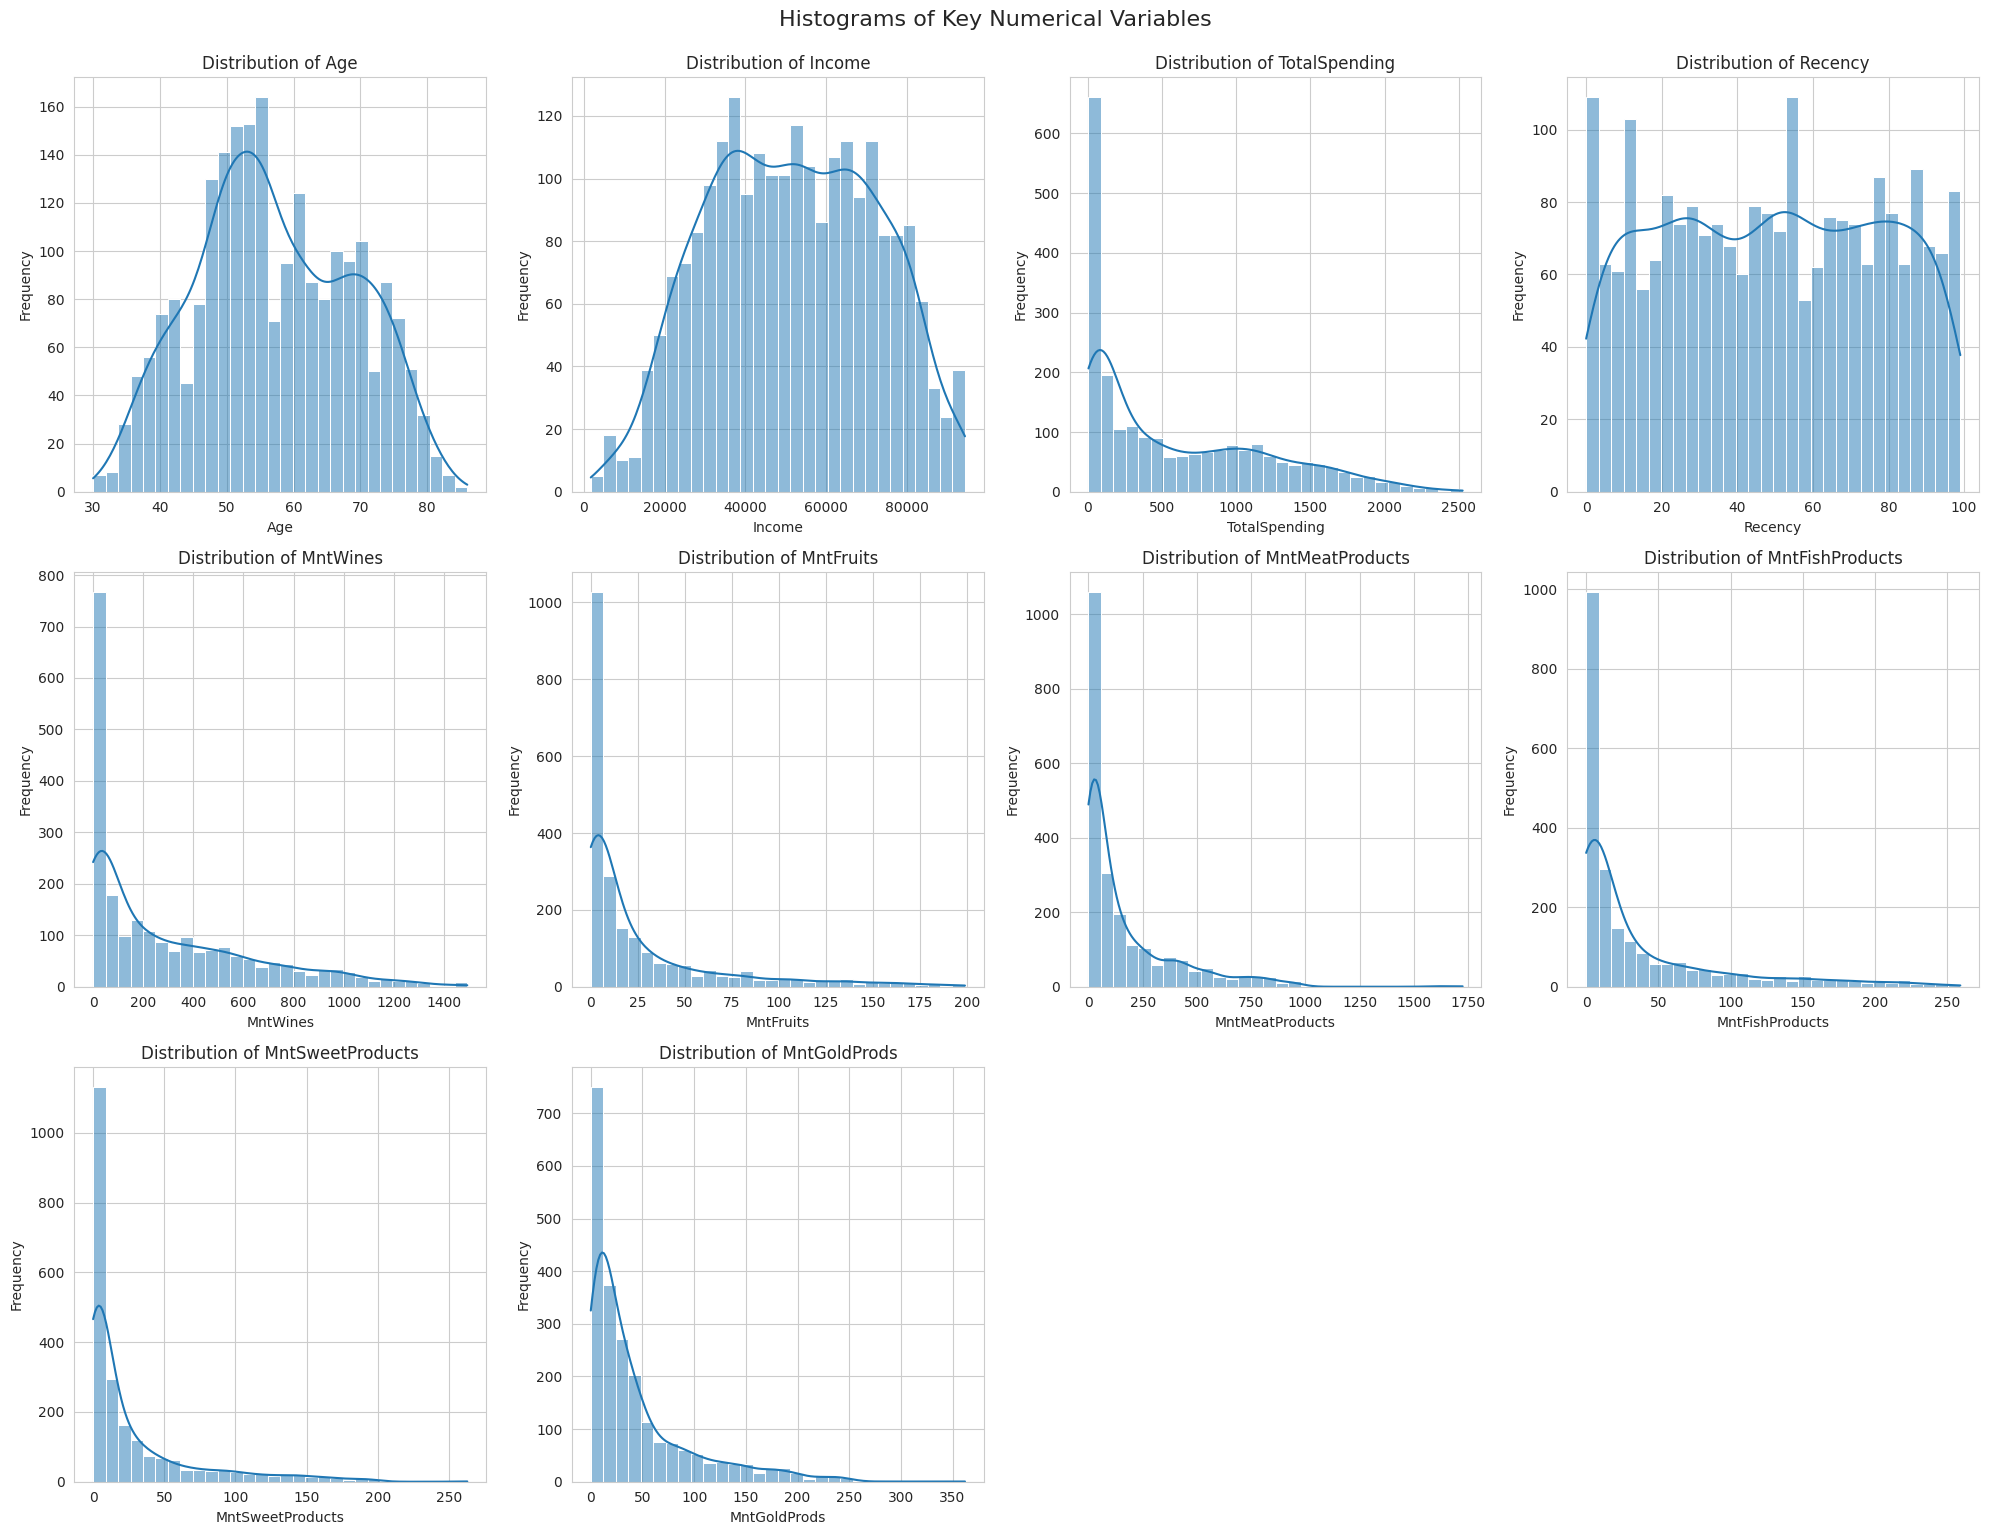

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

# Set style for plots
sns.set_style('whitegrid')

# Analyze distributions of key numerical variables using histograms
numerical_cols = ['Age', 'Income', 'TotalSpending', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()


/tmp/ipython-input-46815464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-46815464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-46815464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-46815464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

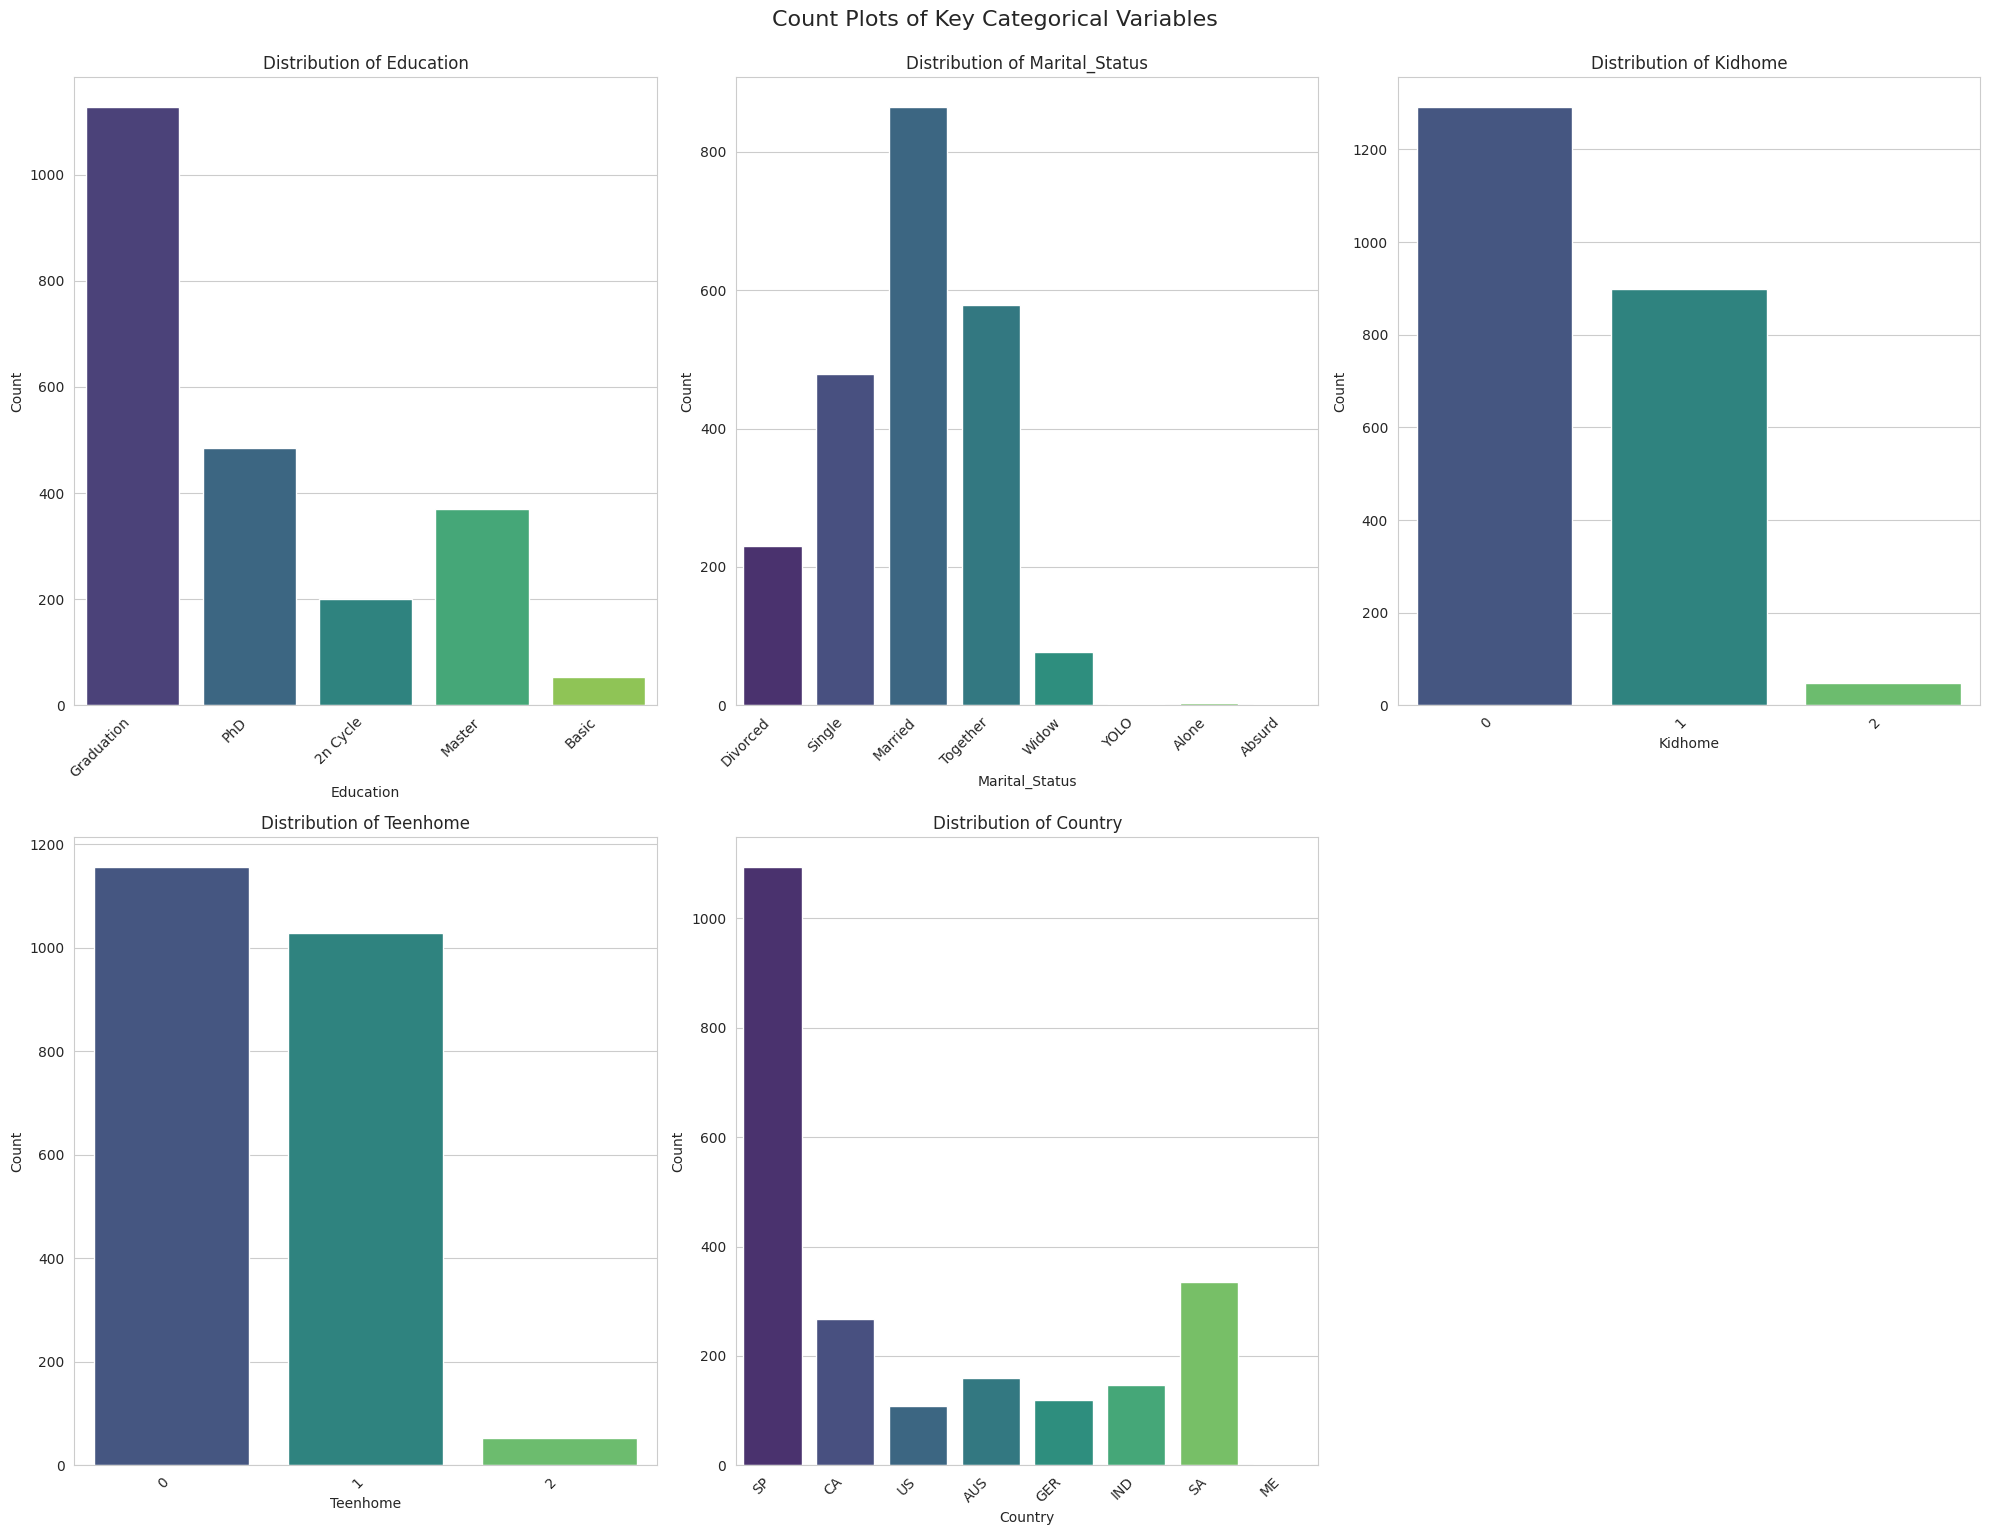

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze distributions of key categorical variables using count plots
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Country']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.suptitle('Count Plots of Key Categorical Variables', y=1.02, fontsize=16)
plt.show()

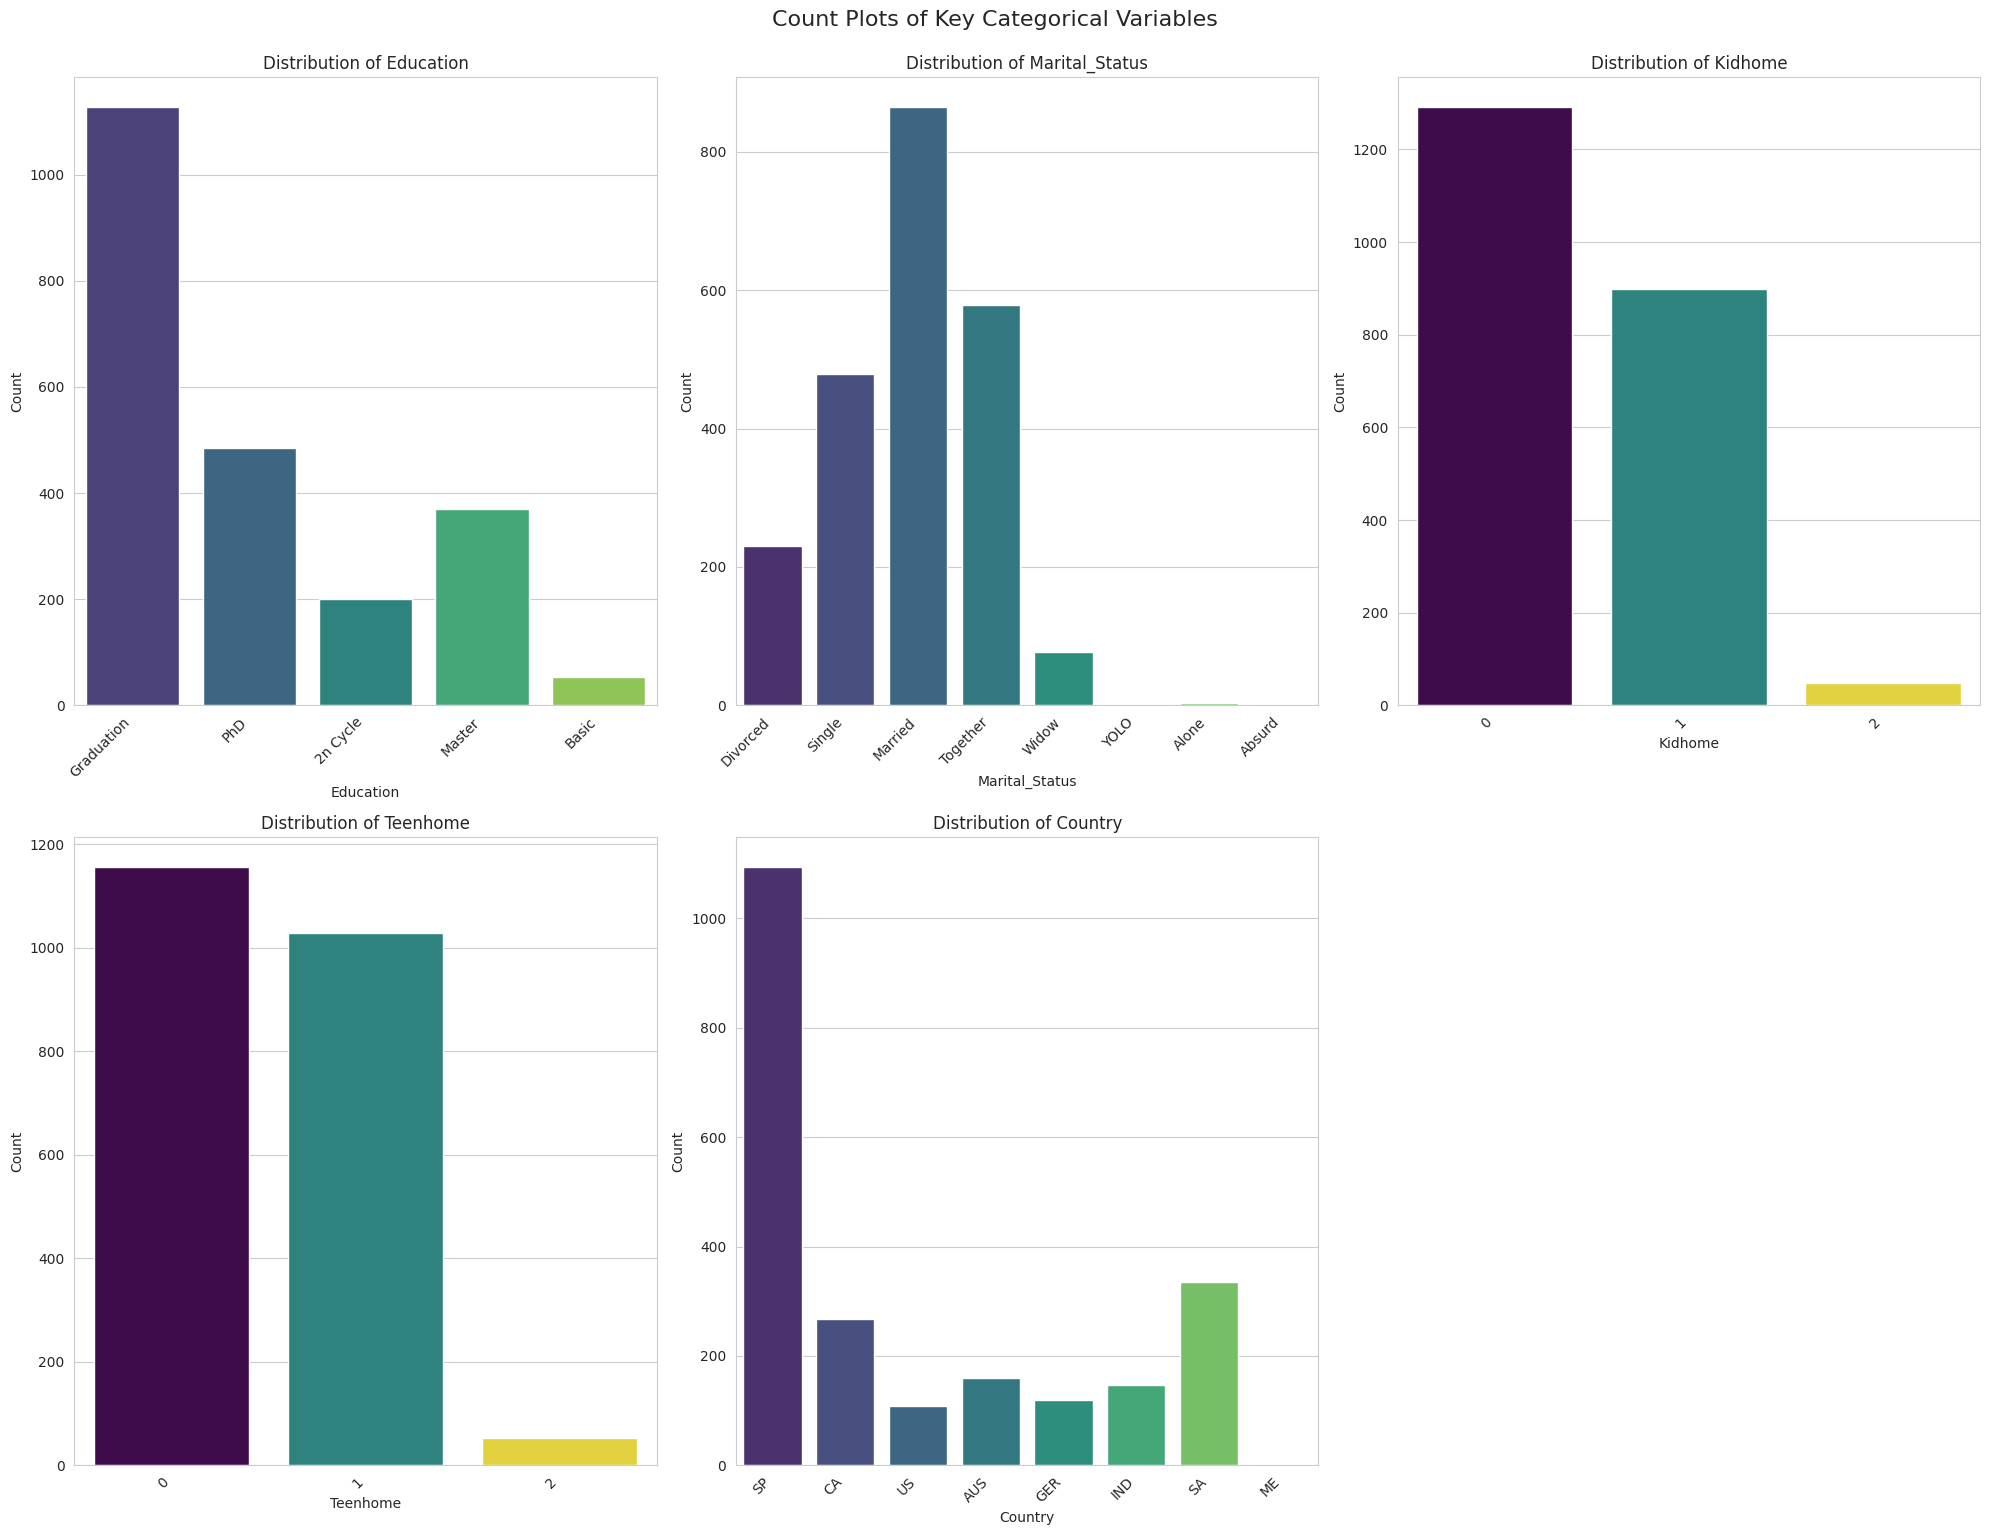

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze distributions of key categorical variables using count plots
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Country']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.suptitle('Count Plots of Key Categorical Variables', y=1.02, fontsize=16)
plt.show()

/tmp/ipython-input-802295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='TotalSpending', palette='pastel')
/tmp/ipython-input-802295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='TotalSpending', palette='pastel')
/tmp/ipython-input-802295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='TotalSpending', palette='pastel')
/tmp/ipython-input-802295.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

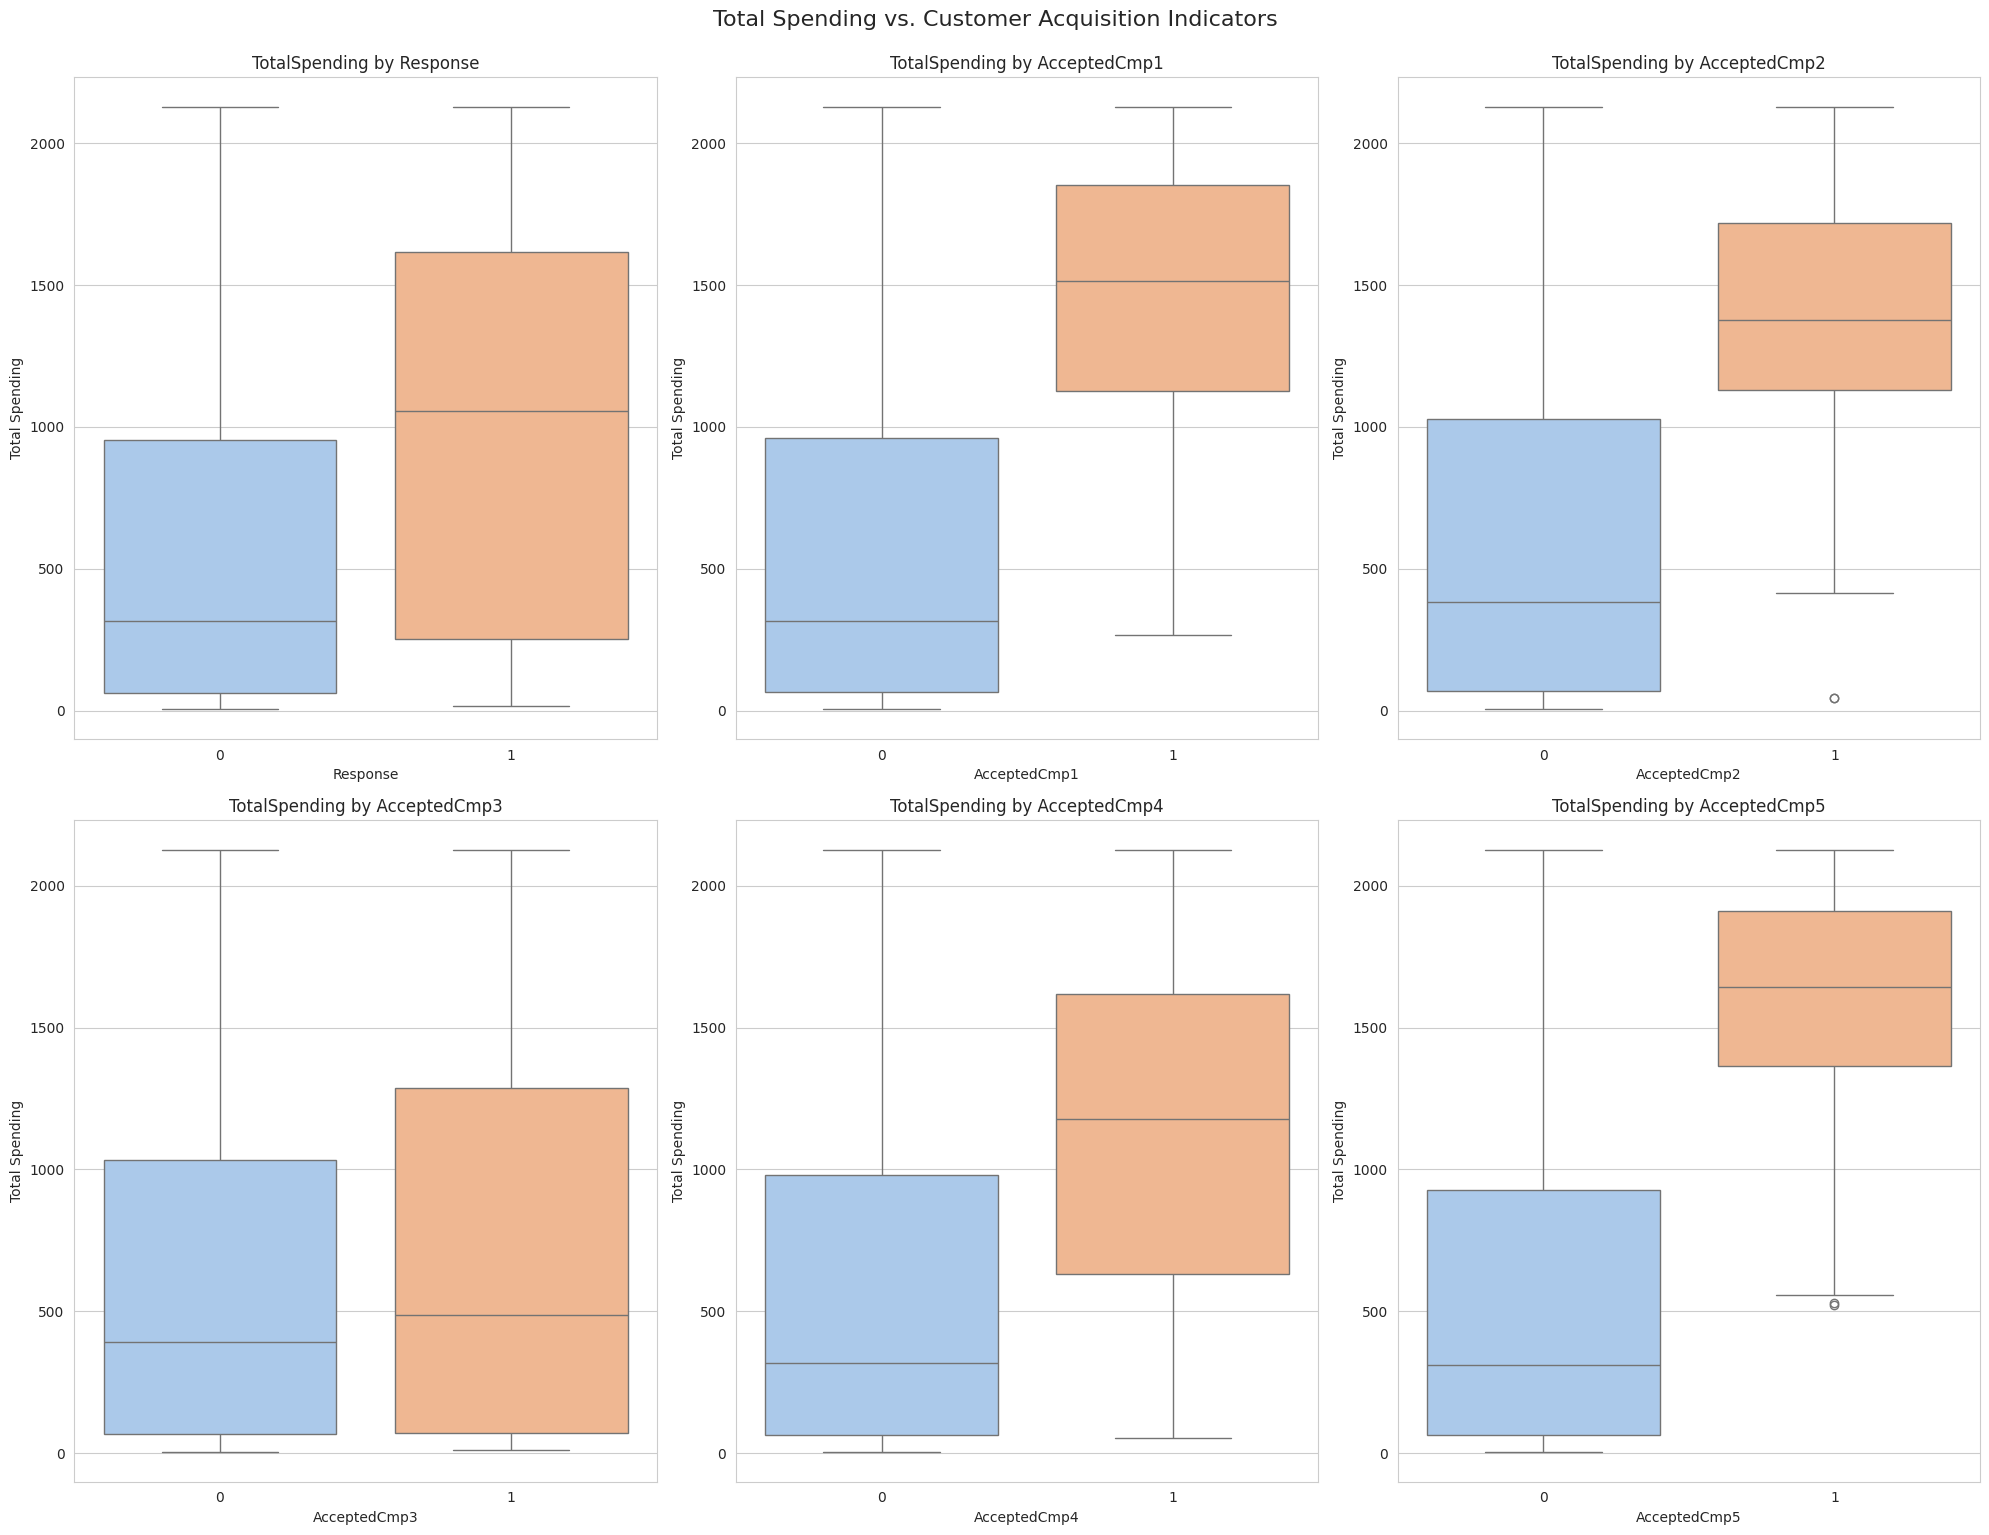

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate relationships between 'TotalSpending' and customer acquisition indicators
campaign_response_cols = ['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

plt.figure(figsize=(20, 15))
for i, col in enumerate(campaign_response_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(data=df, x=col, y='TotalSpending', palette='pastel')
    plt.title(f'TotalSpending by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Spending')
plt.tight_layout()
plt.suptitle('Total Spending vs. Customer Acquisition Indicators', y=1.02, fontsize=16)
plt.show()

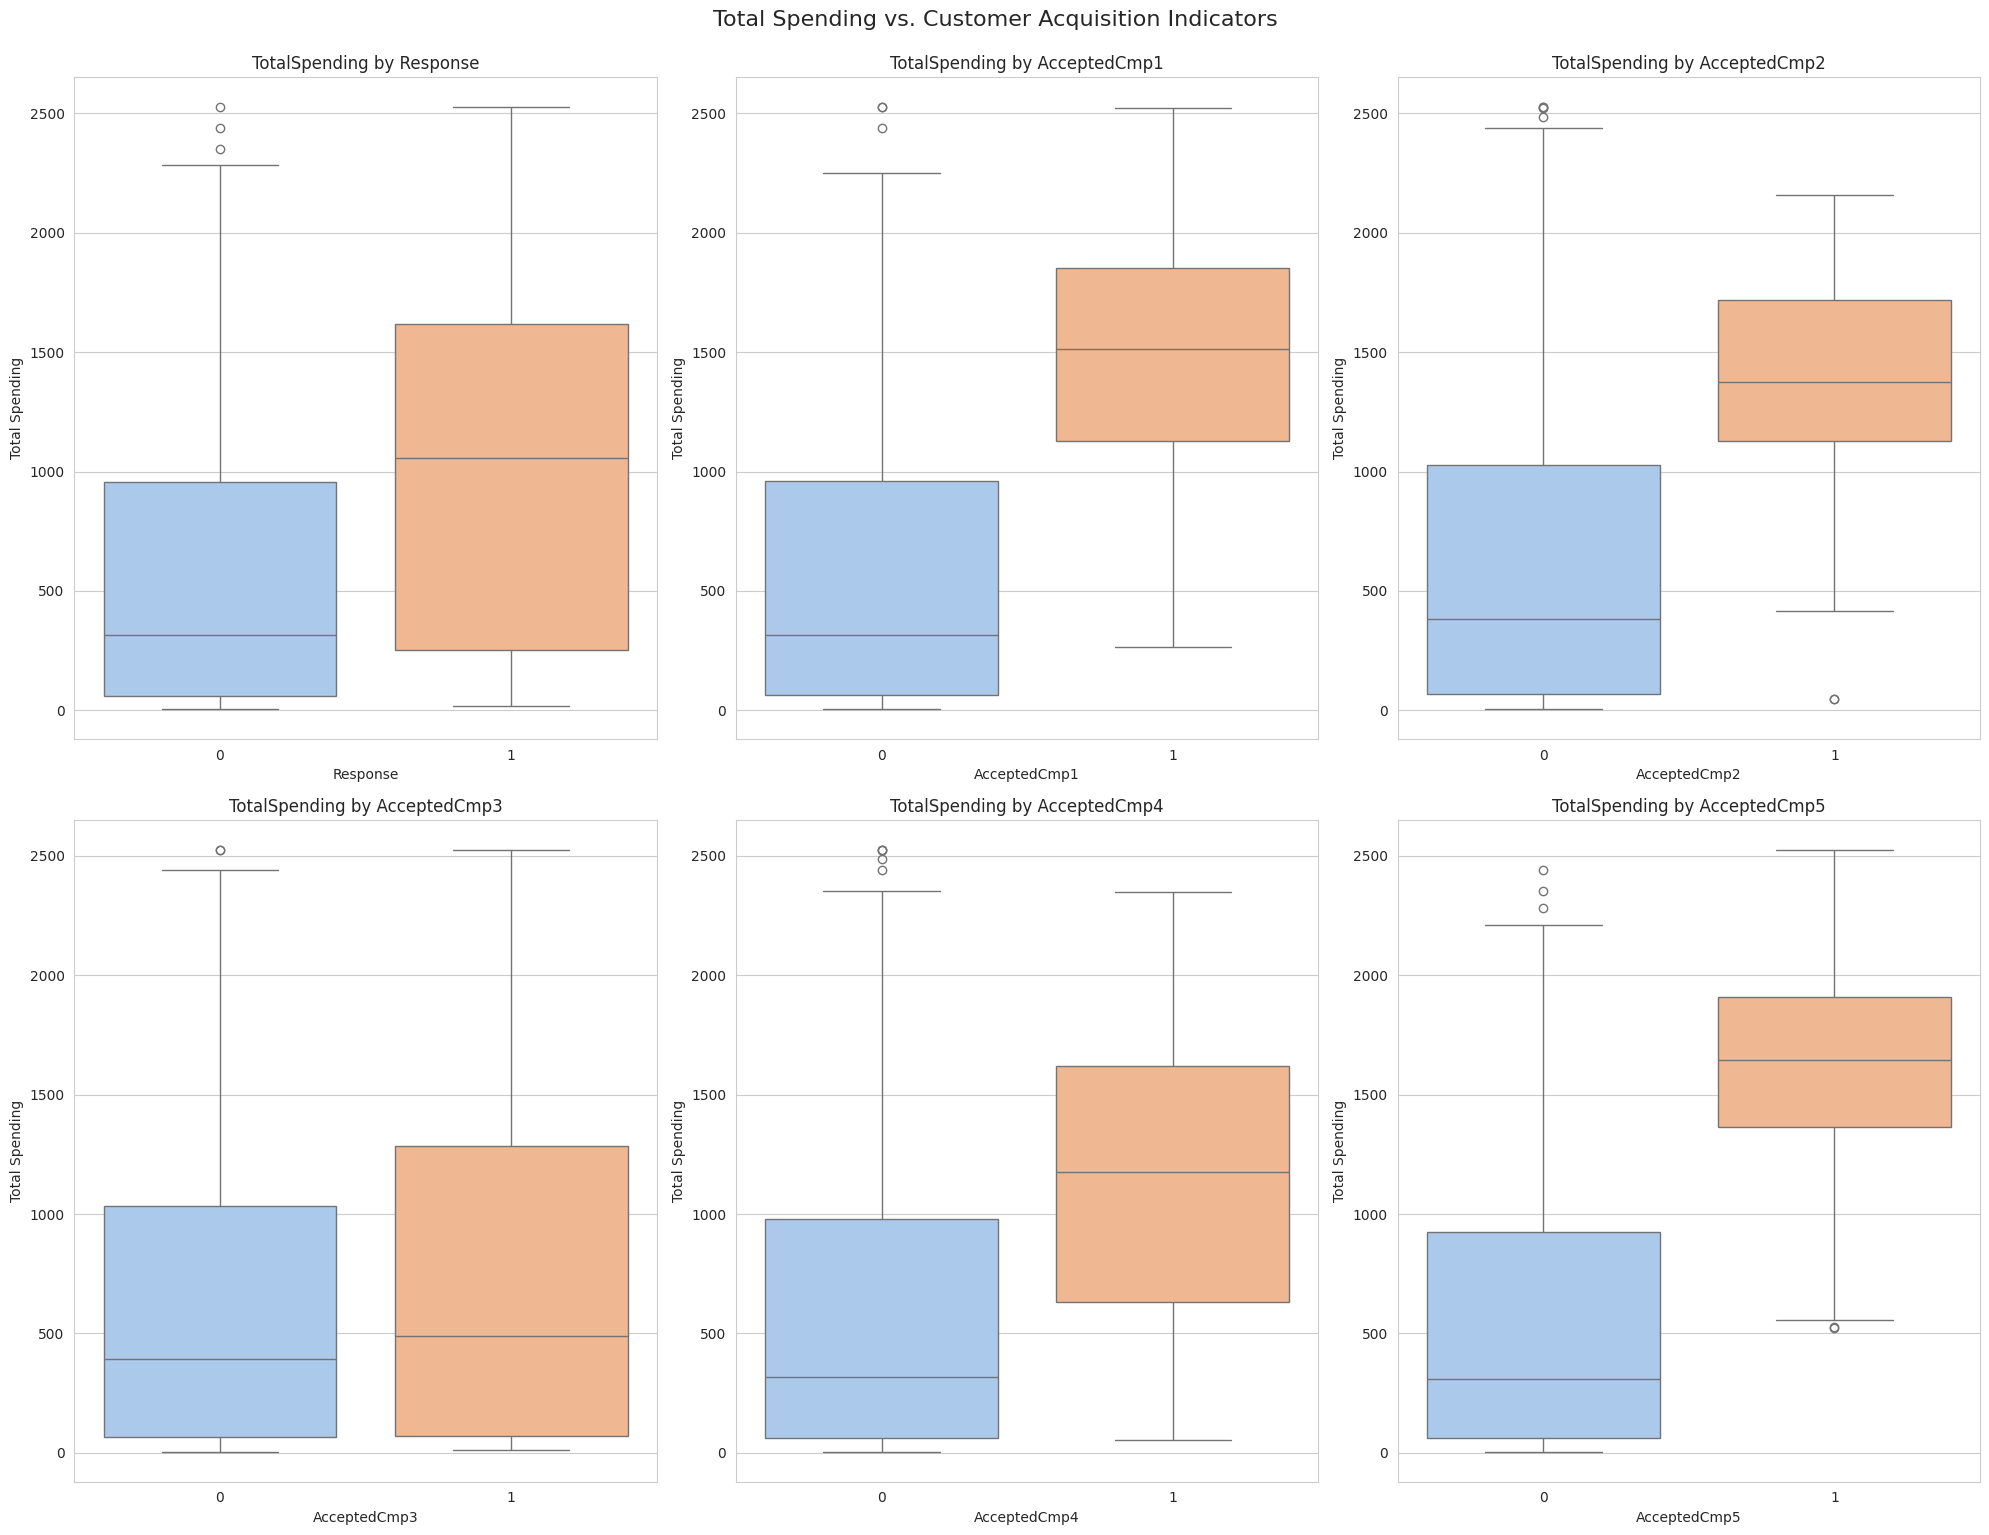

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Investigate relationships between 'TotalSpending' and customer acquisition indicators
campaign_response_cols = ['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

plt.figure(figsize=(20, 15))
for i, col in enumerate(campaign_response_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(data=df, x=col, y='TotalSpending', hue=col, legend=False, palette='pastel')
    plt.title(f'TotalSpending by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Spending')
plt.tight_layout()
plt.suptitle('Total Spending vs. Customer Acquisition Indicators', y=1.02, fontsize=16)
plt.show()

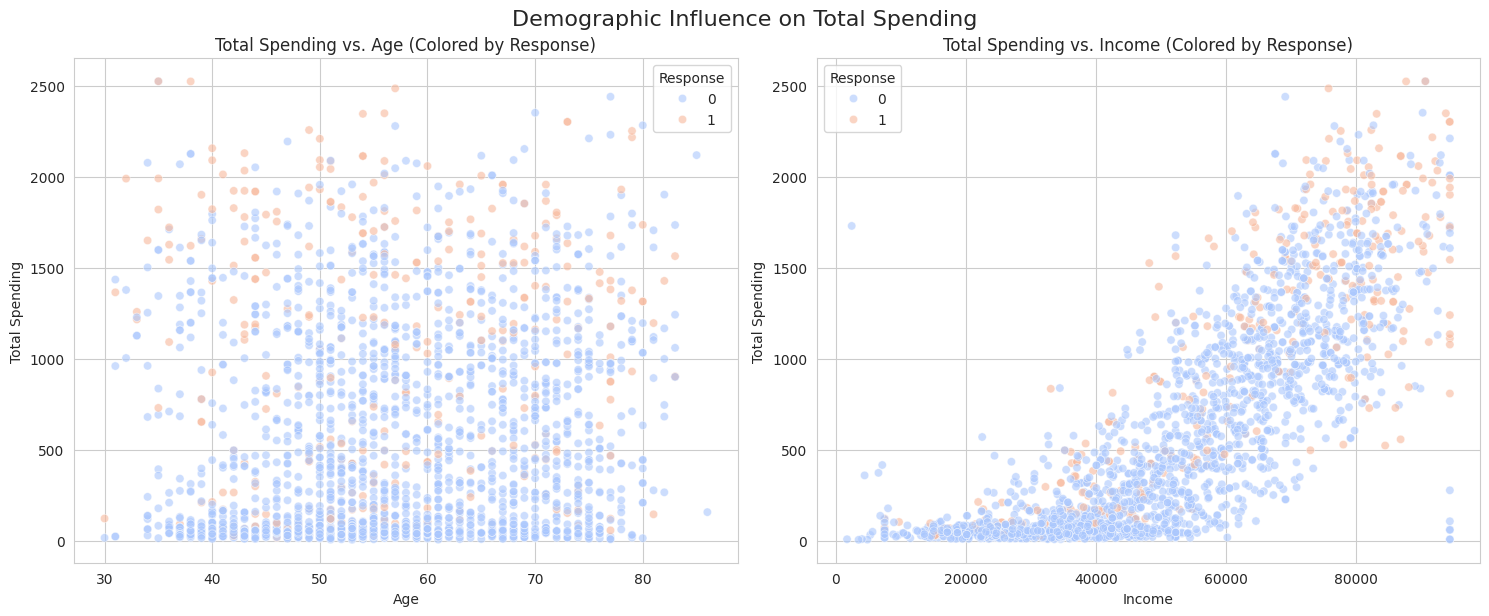

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore influence of demographic features on 'TotalSpending'
# 5a. Scatter plots for 'Age' vs 'TotalSpending' and 'Income' vs 'TotalSpending'

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='TotalSpending', hue='Response', palette='coolwarm', alpha=0.6)
plt.title('Total Spending vs. Age (Colored by Response)')
plt.xlabel('Age')
plt.ylabel('Total Spending')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Income', y='TotalSpending', hue='Response', palette='coolwarm', alpha=0.6)
plt.title('Total Spending vs. Income (Colored by Response)')
plt.xlabel('Income')
plt.ylabel('Total Spending')

plt.tight_layout()
plt.suptitle('Demographic Influence on Total Spending', y=1.02, fontsize=16)
plt.show()

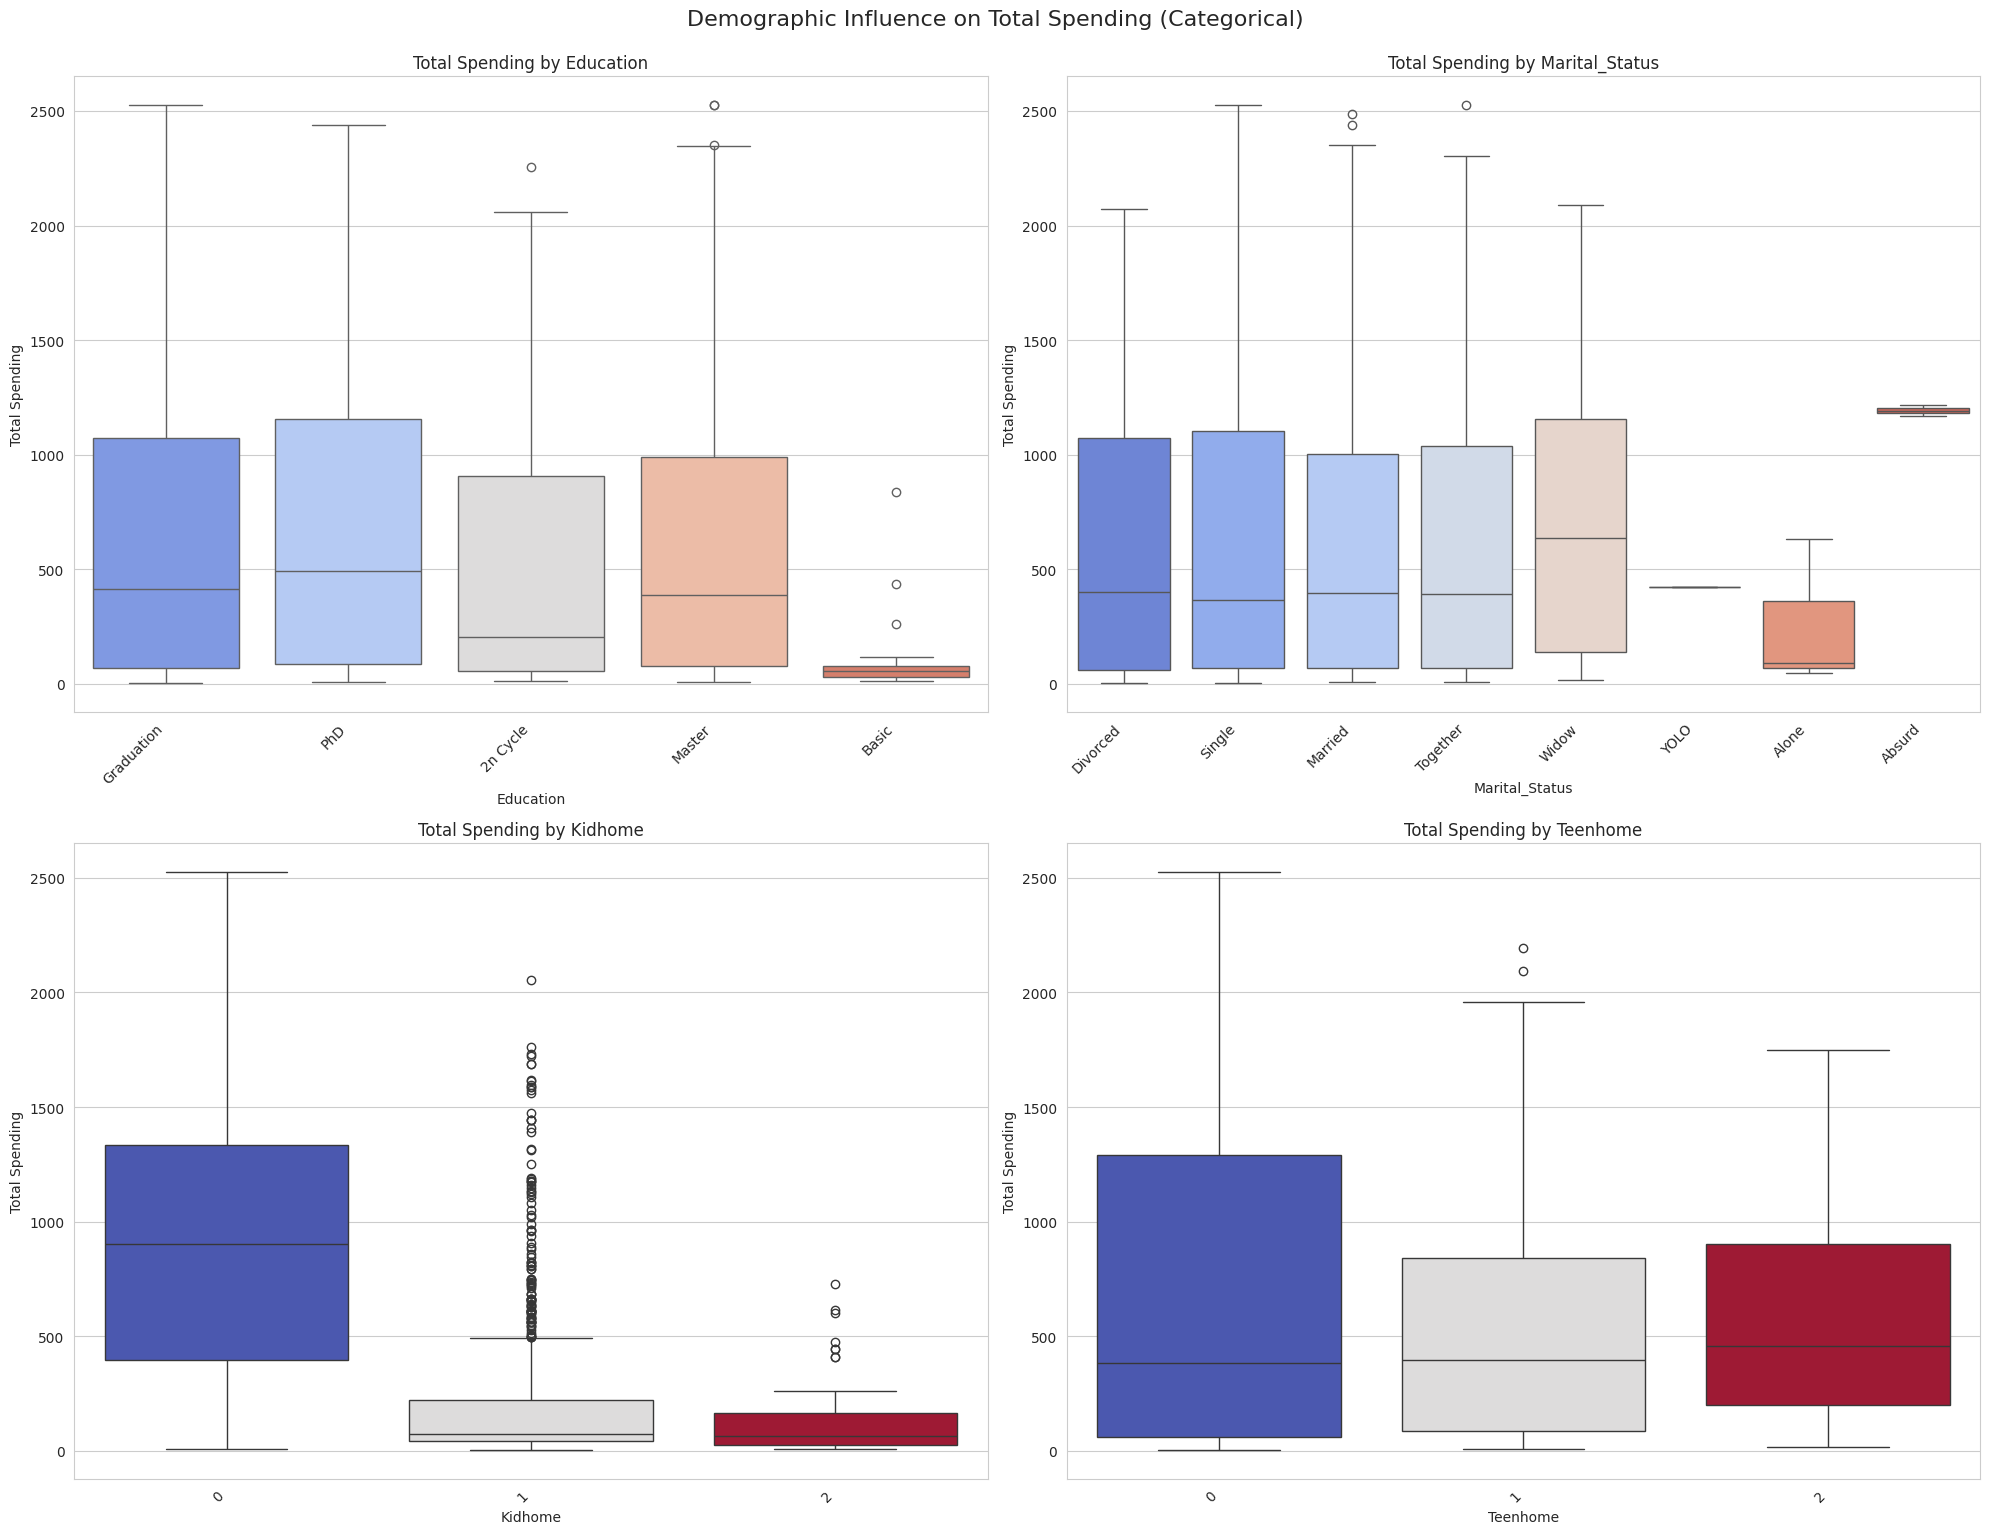

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5b. Use box plots or bar plots to compare 'TotalSpending' across different 'Education' levels, 'Marital_Status' categories, and 'Kidhome'/'Teenhome' groups.

demographic_categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_categorical_cols):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.boxplot(data=df, x=col, y='TotalSpending', hue=col, legend=False, palette='coolwarm')
    plt.title(f'Total Spending by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Spending')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.suptitle('Demographic Influence on Total Spending (Categorical)', y=1.02, fontsize=16)
plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'multiple'

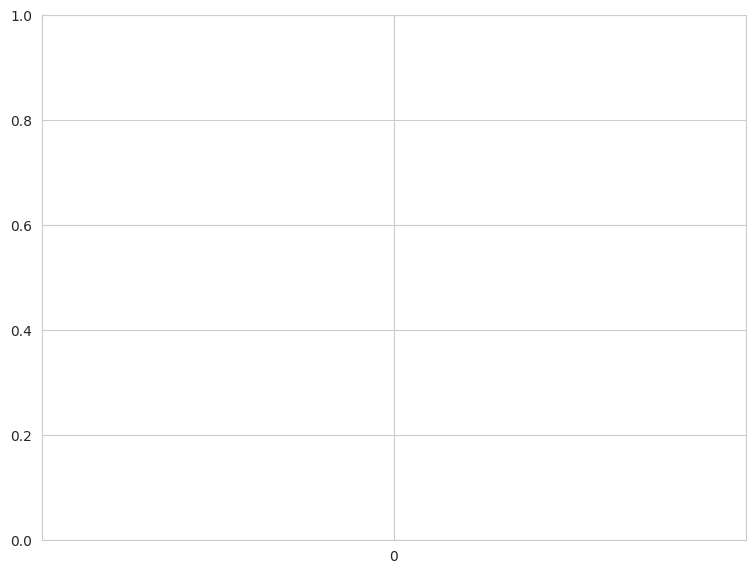

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5c. Use count plots or stacked bar plots to visualize the proportion of 'Response' (or campaign acceptance) for different 'Education' levels, 'Marital_Status' categories, and 'Kidhome'/'Teenhome' groups.

demographic_categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_categorical_cols):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.countplot(data=df, x=col, hue='Response', palette='viridis', multiple='stack')
    plt.title(f'Response Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Response')
plt.tight_layout()
plt.suptitle('Demographic Influence on Customer Response (Categorical)', y=1.02, fontsize=16)
plt.show()

/tmp/ipython-input-3579715698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Response')
/tmp/ipython-input-3579715698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Response')
/tmp/ipython-input-3579715698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Response')
/tmp/ipython-input-3579715698.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Response')


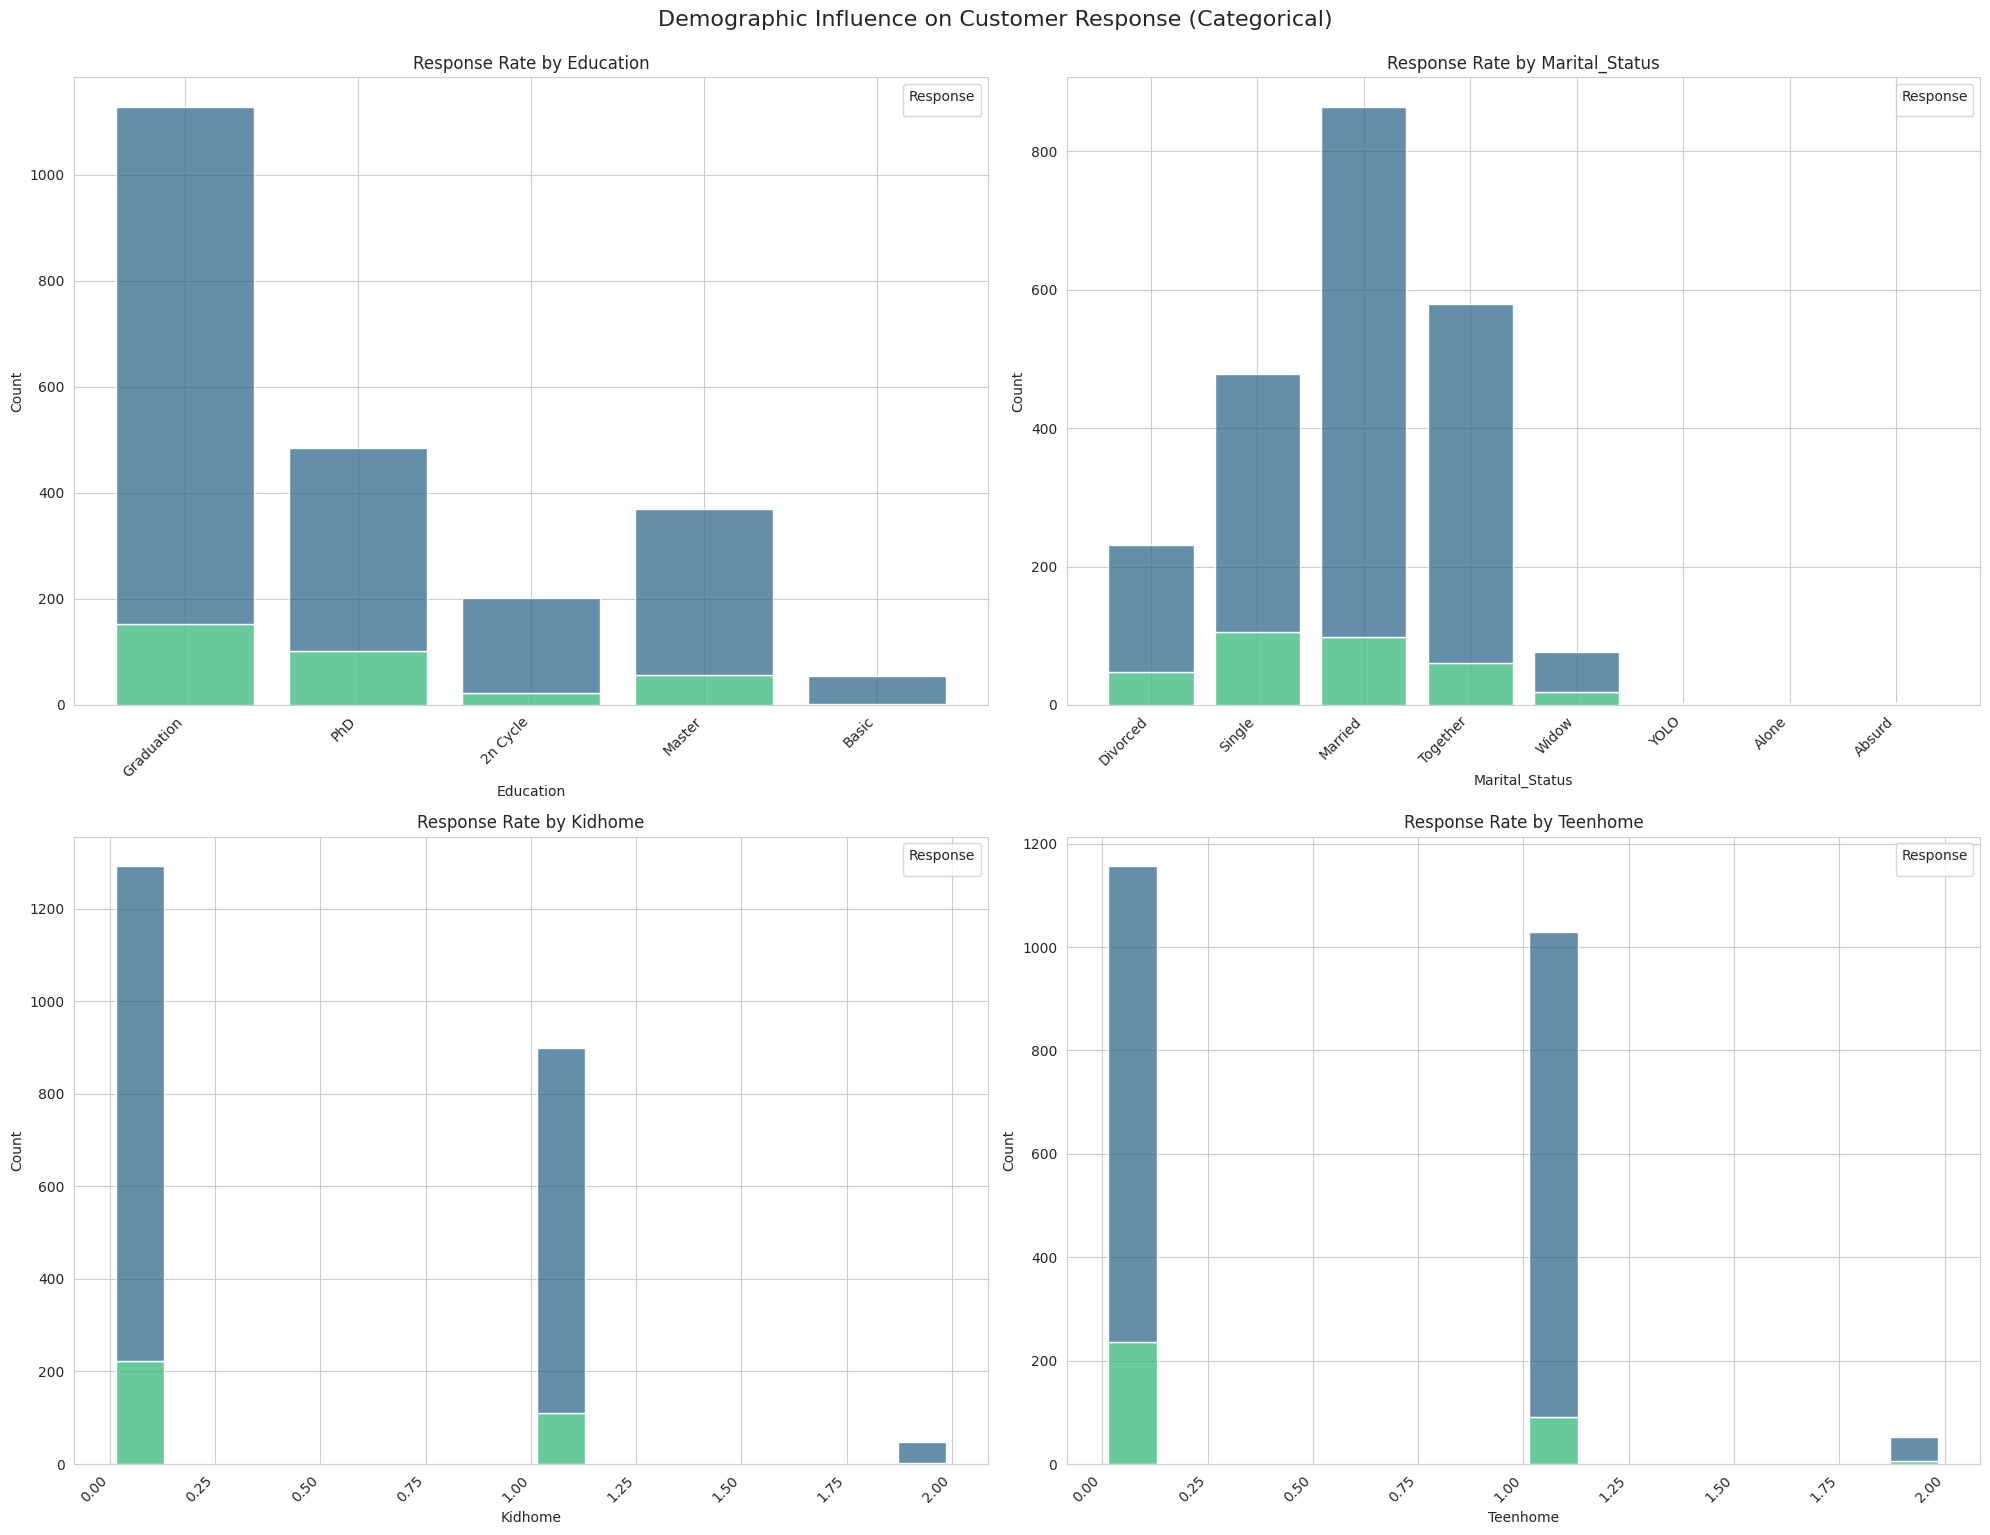

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5c. Use count plots or stacked bar plots to visualize the proportion of 'Response' (or campaign acceptance) for different 'Education' levels, 'Marital_Status' categories, and 'Kidhome'/'Teenhome' groups.

demographic_categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_categorical_cols):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(data=df, x=col, hue='Response', multiple='stack', palette='viridis', shrink=0.8) # Changed to histplot for stacked bars
    plt.title(f'Response Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Response')
plt.tight_layout()
plt.suptitle('Demographic Influence on Customer Response (Categorical)', y=1.02, fontsize=16)
plt.show()

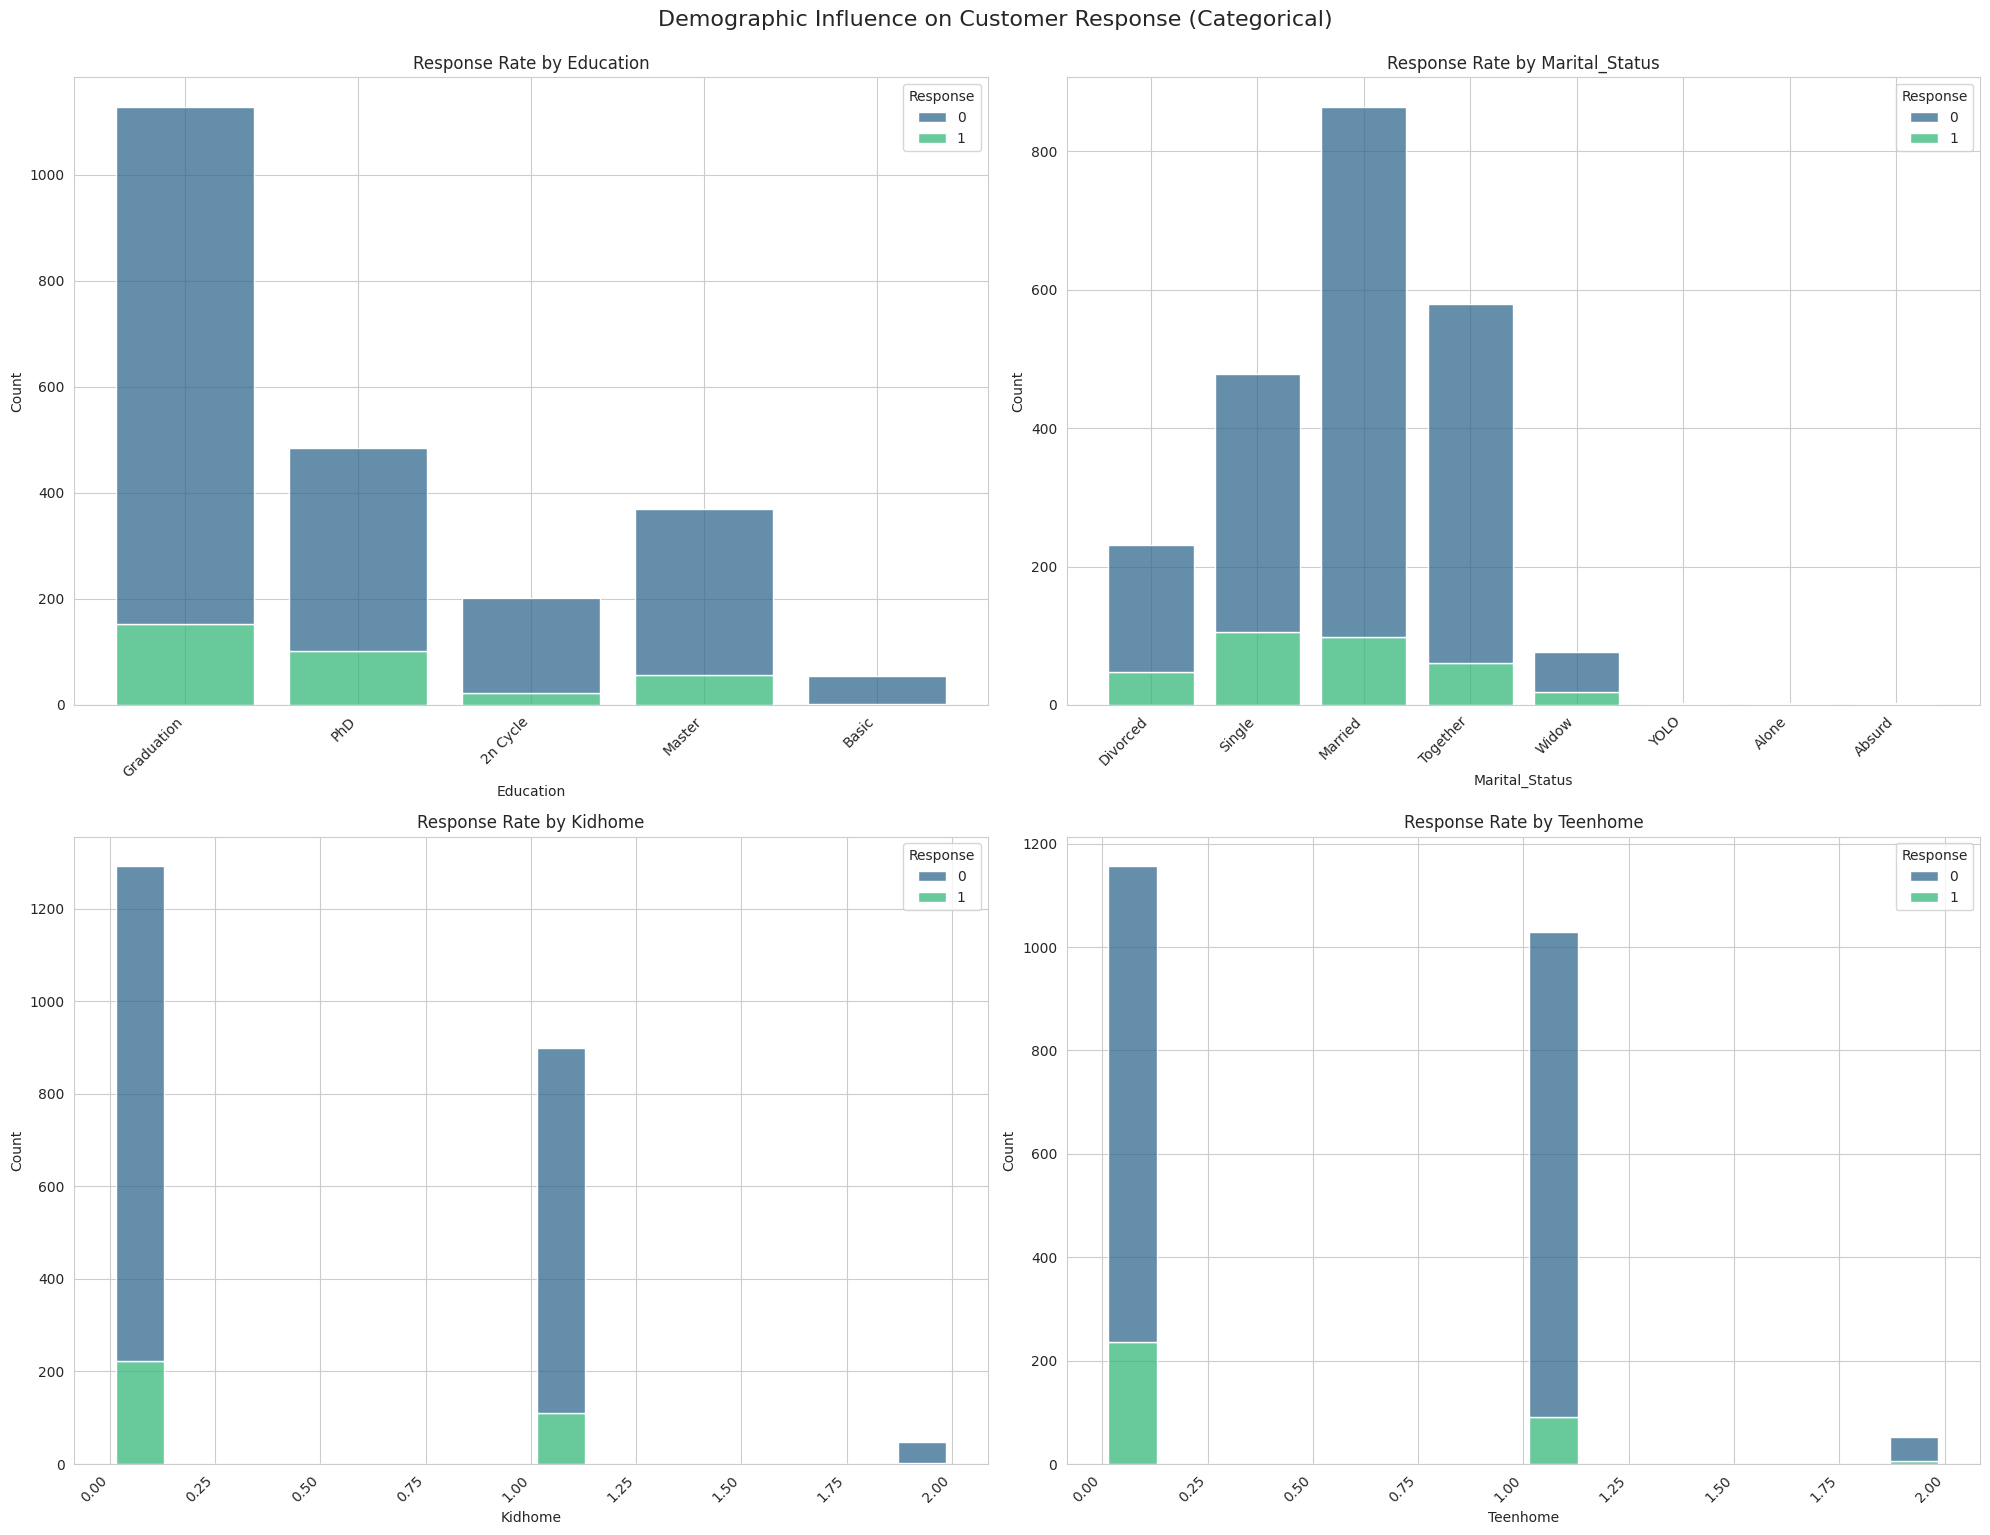

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5c. Use count plots or stacked bar plots to visualize the proportion of 'Response' (or campaign acceptance) for different 'Education' levels, 'Marital_Status' categories, and 'Kidhome'/'Teenhome' groups.

demographic_categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']

plt.figure(figsize=(20, 15))
for i, col in enumerate(demographic_categorical_cols):
    plt.subplot(2, 2, i + 1) # Adjust subplot grid as needed
    sns.histplot(data=df, x=col, hue='Response', multiple='stack', palette='viridis', shrink=0.8) # Changed to histplot for stacked bars
    plt.title(f'Response Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    # Removed: plt.legend(title='Response') - seaborn's histplot with hue usually handles this.
plt.tight_layout()
plt.suptitle('Demographic Influence on Customer Response (Categorical)', y=1.02, fontsize=16)
plt.show()

## Formulate and Test Hypotheses

Formulate hypotheses based on EDA insights and perform statistical tests to validate if there are significant differences in 'TotalSpending' across different 'Education' levels and 'Marital_Status' categories.


In [28]:
from scipy.stats import f_oneway

# 1. Hypothesis Testing for Education levels
print("\nHypothesis Testing: TotalSpending vs. Education Levels")
education_levels = df['Education'].unique()

education_spending = []
for level in education_levels:
    education_spending.append(df[df['Education'] == level]['TotalSpending'])

f_statistic_education, p_value_education = f_oneway(*education_spending)
print(f"ANOVA F-statistic for Education: {f_statistic_education:.2f}")
print(f"ANOVA p-value for Education: {p_value_education:.3f}")

# 2. Hypothesis Testing for Marital_Status categories
print("\nHypothesis Testing: TotalSpending vs. Marital Status Categories")
marital_status_categories = df['Marital_Status'].unique()

marital_spending = []
for category in marital_status_categories:
    marital_spending.append(df[df['Marital_Status'] == category]['TotalSpending'])

f_statistic_marital, p_value_marital = f_oneway(*marital_spending)
print(f"ANOVA F-statistic for Marital Status: {f_statistic_marital:.2f}")
print(f"ANOVA p-value for Marital Status: {p_value_marital:.3f}")


Hypothesis Testing: TotalSpending vs. Education Levels
ANOVA F-statistic for Education: 13.60
ANOVA p-value for Education: 0.000

Hypothesis Testing: TotalSpending vs. Marital Status Categories
ANOVA F-statistic for Marital Status: 1.06
ANOVA p-value for Marital Status: 0.386


## Visualize Key Findings

Generate appropriate visualizations to effectively present the key findings from both the EDA and hypothesis testing phases. Specifically, visualize the significant differences in 'TotalSpending' across different 'Education' levels.



I will create a box plot to visualize the 'TotalSpending' across different 'Education' levels, as this was identified as a statistically significant difference in the hypothesis testing phase.



/tmp/ipython-input-1102929300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Education', y='TotalSpending', palette='viridis')


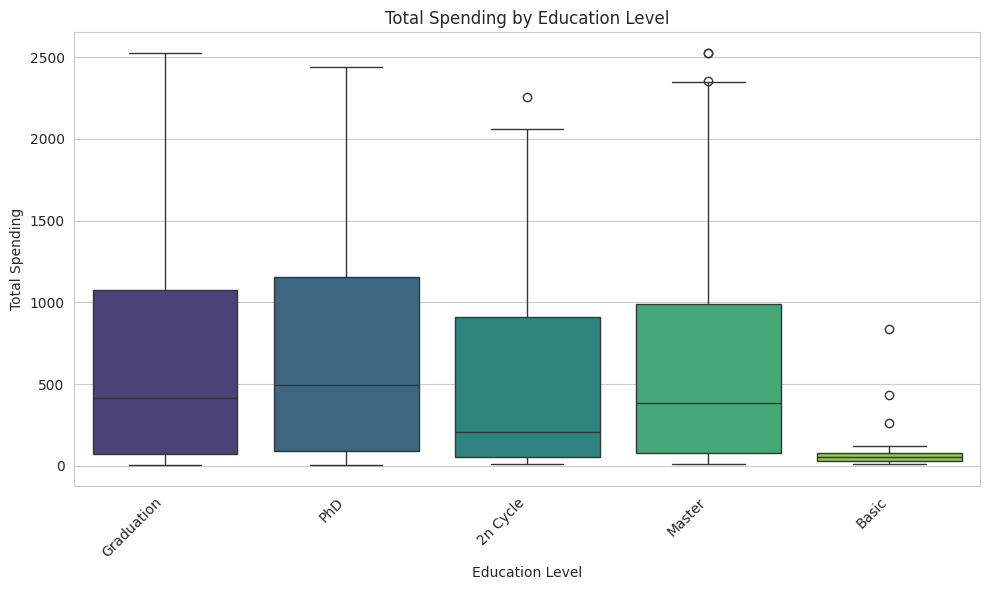

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Create a box plot to visualize TotalSpending across different Education levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='TotalSpending', palette='viridis')
plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The previous code generated a `FutureWarning` regarding the use of `palette` without assigning `hue` in `sns.boxplot`. To address this, I will explicitly assign the `x` variable to `hue` and set `legend=False`, as suggested by the warning.



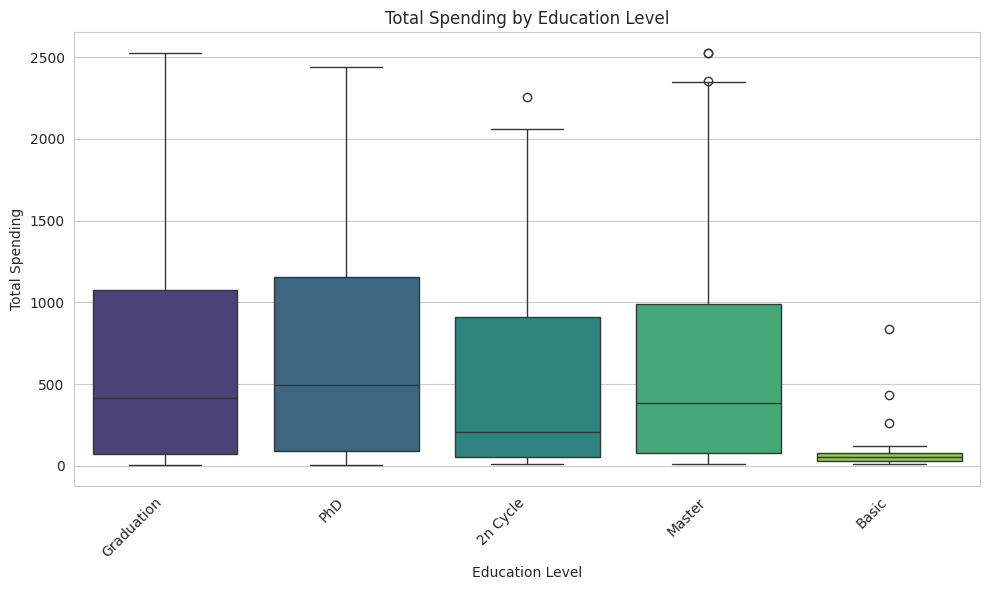

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Create a box plot to visualize TotalSpending across different Education levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='TotalSpending', hue='Education', legend=False, palette='viridis')
plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The current `df` DataFrame has successfully been loaded, inspected, and underwent initial preprocessing including cleaning and imputing the 'Income' column, converting 'Dt_Customer' to datetime objects, and engineering 'Age' and 'TotalSpending'. Outliers in 'Age' and 'Income' have also been handled. The next step is to further preprocess the data by cleaning categorical variables, creating additional features, and treating outliers in the newly created numerical features.

The next step in the plan is to:
1.  **Clean the 'Education' and 'Marital_Status' columns**: Address inconsistent spellings or unusual entries like 'YOLO' and 'Absurd'.
2.  **Create 'TotalChildren' feature**: This will be the sum of 'Kidhome' and 'Teenhome'.
3.  **Create 'TotalPurchases' feature**: This will be the sum of 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', and 'NumStorePurchases'.
4.  **Apply outlier treatment**: Specifically to 'TotalSpending' and 'TotalPurchases', likely using a capping method similar to 'Income'.

## Clean the 'Education' and 'Marital_Status' columns


Address inconsistent spellings or unusual entries in 'Education' and 'Marital_Status' columns.


I will inspect the unique values in the 'Education' column to identify any inconsistencies or unusual entries, as per the first instruction.



In [68]:
print("Unique values in 'Education' column before cleaning:")
print(df['Education'].unique())

Unique values in 'Education' column before cleaning:
[2 4 1 3 0]


Now that the unique values for 'Education' have been inspected, I will standardize '2n Cycle' to '2nd Cycle' to ensure consistency in the 'Education' column, as per the instructions.



In [69]:
df['Education'] = df['Education'].replace({'2n Cycle': '2nd Cycle'})

print("Unique values in 'Education' column after cleaning:")
print(df['Education'].unique())

Unique values in 'Education' column after cleaning:
[2 4 1 3 0]


Following the previous step of cleaning the 'Education' column, I will now inspect the unique values in the 'Marital_Status' column to identify any inconsistencies or unusual entries, as per the instructions.



In [70]:
print("Unique values in 'Marital_Status' column before cleaning:")
print(df['Marital_Status'].unique())

Unique values in 'Marital_Status' column before cleaning:


KeyError: 'Marital_Status'

Now that the unique values for 'Marital_Status' have been inspected and 'YOLO' and 'Absurd' have been identified, I will standardize these entries by mapping 'YOLO', 'Absurd', and 'Alone' to 'Single' to ensure consistency, as per the instructions.



In [66]:
df['Marital_Status'] = df['Marital_Status'].replace({'YOLO': 'Single', 'Absurd': 'Single', 'Alone': 'Single'})

print("Unique values in 'Marital_Status' column after cleaning:")
print(df['Marital_Status'].unique())

KeyError: 'Marital_Status'

**Reasoning**:
The 'Education' and 'Marital_Status' columns have been cleaned. The next instruction in the task is to create the 'TotalChildren' feature by summing 'Kidhome' and 'Teenhome' columns.



In [33]:
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

print("First 5 rows with 'TotalChildren' column:")
print(df[['Kidhome', 'Teenhome', 'TotalChildren']].head())

First 5 rows with 'TotalChildren' column:
   Kidhome  Teenhome  TotalChildren
0        0         0              0
1        0         0              0
2        0         1              1
3        1         1              2
4        1         0              1


**Reasoning**:
The 'TotalChildren' feature has been created. The next step in the task is to create the 'TotalPurchases' feature, which involves summing several purchase-related columns.



In [34]:
df['TotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

print("First 5 rows with 'TotalPurchases' column:")
print(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'TotalPurchases']].head())

First 5 rows with 'TotalPurchases' column:
   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   TotalPurchases  
0              15  
1              18  
2              11  
3               4  
4               8  


The 'TotalPurchases' feature has been successfully created.

Now, let's address the last part of the preprocessing and feature engineering: **Apply outlier treatment** to the newly created numerical features, specifically 'TotalSpending' and 'TotalPurchases', using a capping method similar to how 'Income' was handled.

**Reasoning**:
The next step is to apply outlier treatment to 'TotalSpending' and 'TotalPurchases'. I will calculate the 99th percentile for each and cap values exceeding these thresholds, similar to how 'Income' was handled previously.



In [35]:
import numpy as np

# Handle outliers in 'TotalSpending'
totalspending_99th_percentile = df['TotalSpending'].quantile(0.99)
df.loc[:, 'TotalSpending'] = np.where(df['TotalSpending'] > totalspending_99th_percentile, totalspending_99th_percentile, df['TotalSpending'])

# Handle outliers in 'TotalPurchases'
totalpurchases_99th_percentile = df['TotalPurchases'].quantile(0.99)
df.loc[:, 'TotalPurchases'] = np.where(df['TotalPurchases'] > totalpurchases_99th_percentile, totalpurchases_99th_percentile, df['TotalPurchases'])

print("DataFrame head after outlier handling for TotalSpending and TotalPurchases:")
print(df.head())
print("\nDescriptive statistics after outlier handling (TotalSpending and TotalPurchases):")
print(df[['TotalSpending', 'TotalPurchases']].describe())

DataFrame head after outlier handling for TotalSpending and TotalPurchases:
      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2014-06-16        0       189  ...             0             0   
1  2014-06-15        0       464  ...             0             0   
2  2014-05-13        0       134  ...             0             0   
3  2014-05-11        0        10  ...             0             0   
4  2014-04-08        0         6  ...             0             0   

   AcceptedCmp2  Response  Complai

## Categorical Variable Encoding

### Subtask:
Apply ordinal encoding to the 'Education' column, considering a logical order if applicable.


**Reasoning**:
I will define a dictionary to map 'Education' levels to ordinal numerical values, reflecting a logical order from lowest to highest education, as per the first instruction.



In [36]:
education_mapping = {
    'Basic': 0,
    '2nd Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

print("Education mapping dictionary created.")

Education mapping dictionary created.


**Reasoning**:
I have created the mapping dictionary. Now, I will apply this mapping to the 'Education' column and display the head of the DataFrame along with the unique values of the transformed column to verify the encoding, as per the instructions.



In [37]:
df['Education'] = df['Education'].map(education_mapping)

print("DataFrame head after applying ordinal encoding to 'Education':")
print(df[['Education']].head())

print("\nUnique values in 'Education' column after encoding:")
print(df['Education'].unique())

DataFrame head after applying ordinal encoding to 'Education':
   Education
0          2
1          2
2          2
3          2
4          2

Unique values in 'Education' column after encoding:
[2 4 1 3 0]


## Categorical Variable Encoding

### Subtask:
Apply one-hot encoding to the nominal categorical variables 'Marital_Status' and 'Country'.


**Reasoning**:
I will apply one-hot encoding to the 'Marital_Status' column, dropping the first category to prevent multicollinearity, as per the instructions.



In [38]:
marital_status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first=True)
print("One-hot encoding applied to 'Marital_Status' column.")

One-hot encoding applied to 'Marital_Status' column.


**Reasoning**:
Now that 'Marital_Status' has been one-hot encoded, I will apply one-hot encoding to the 'Country' column, concatenate these new dummy variables with the main DataFrame, drop the original categorical columns, and then display the head to verify the changes, as per the remaining instructions.



In [39]:
country_dummies = pd.get_dummies(df['Country'], prefix='Country', drop_first=True)

# Concatenate the new one-hot encoded columns with the original df DataFrame
df = pd.concat([df, marital_status_dummies, country_dummies], axis=1)

# Drop the original 'Marital_Status' and 'Country' columns
df.drop(['Marital_Status', 'Country'], axis=1, inplace=True)

print("DataFrame head after one-hot encoding 'Marital_Status' and 'Country' and dropping original columns:")
print(df.head())
print("\nDataFrame Info after changes:")
df.info()

DataFrame head after one-hot encoding 'Marital_Status' and 'Country' and dropping original columns:
      ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0   1826        1970          2  84835.0        0         0  2014-06-16   
1      1        1961          2  57091.0        0         0  2014-06-15   
2  10476        1958          2  67267.0        0         1  2014-05-13   
3   1386        1967          2  32474.0        1         1  2014-05-11   
4   5371        1989          2  21474.0        1         0  2014-04-08   

   Recency  MntWines  MntFruits  ...  Marital_Status_Single  \
0        0       189        104  ...                  False   
1        0       464          5  ...                   True   
2        0       134         11  ...                  False   
3        0        10          0  ...                  False   
4        0         6         16  ...                   True   

   Marital_Status_Together  Marital_Status_Widow  Country_CA  Country_

## Generate histograms and box plots for numerical variables

### Subtask:
Generate histograms and box plots for key numerical variables to analyze their distributions and confirm outlier treatment.


**Reasoning**:
I will start by importing the necessary libraries `matplotlib.pyplot` and `seaborn`, then define the list of numerical columns as specified in the instructions to prepare for plotting.



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of numerical columns to visualize
numerical_cols_to_visualize = [
    'Age', 'Income', 'TotalSpending', 'TotalChildren', 'TotalPurchases',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

print("Libraries imported and numerical columns list defined.")

Libraries imported and numerical columns list defined.


**Reasoning**:
Now that the numerical columns are defined, I will generate histograms for each of these columns to visualize their distributions and confirm outlier treatment, as per the instructions.



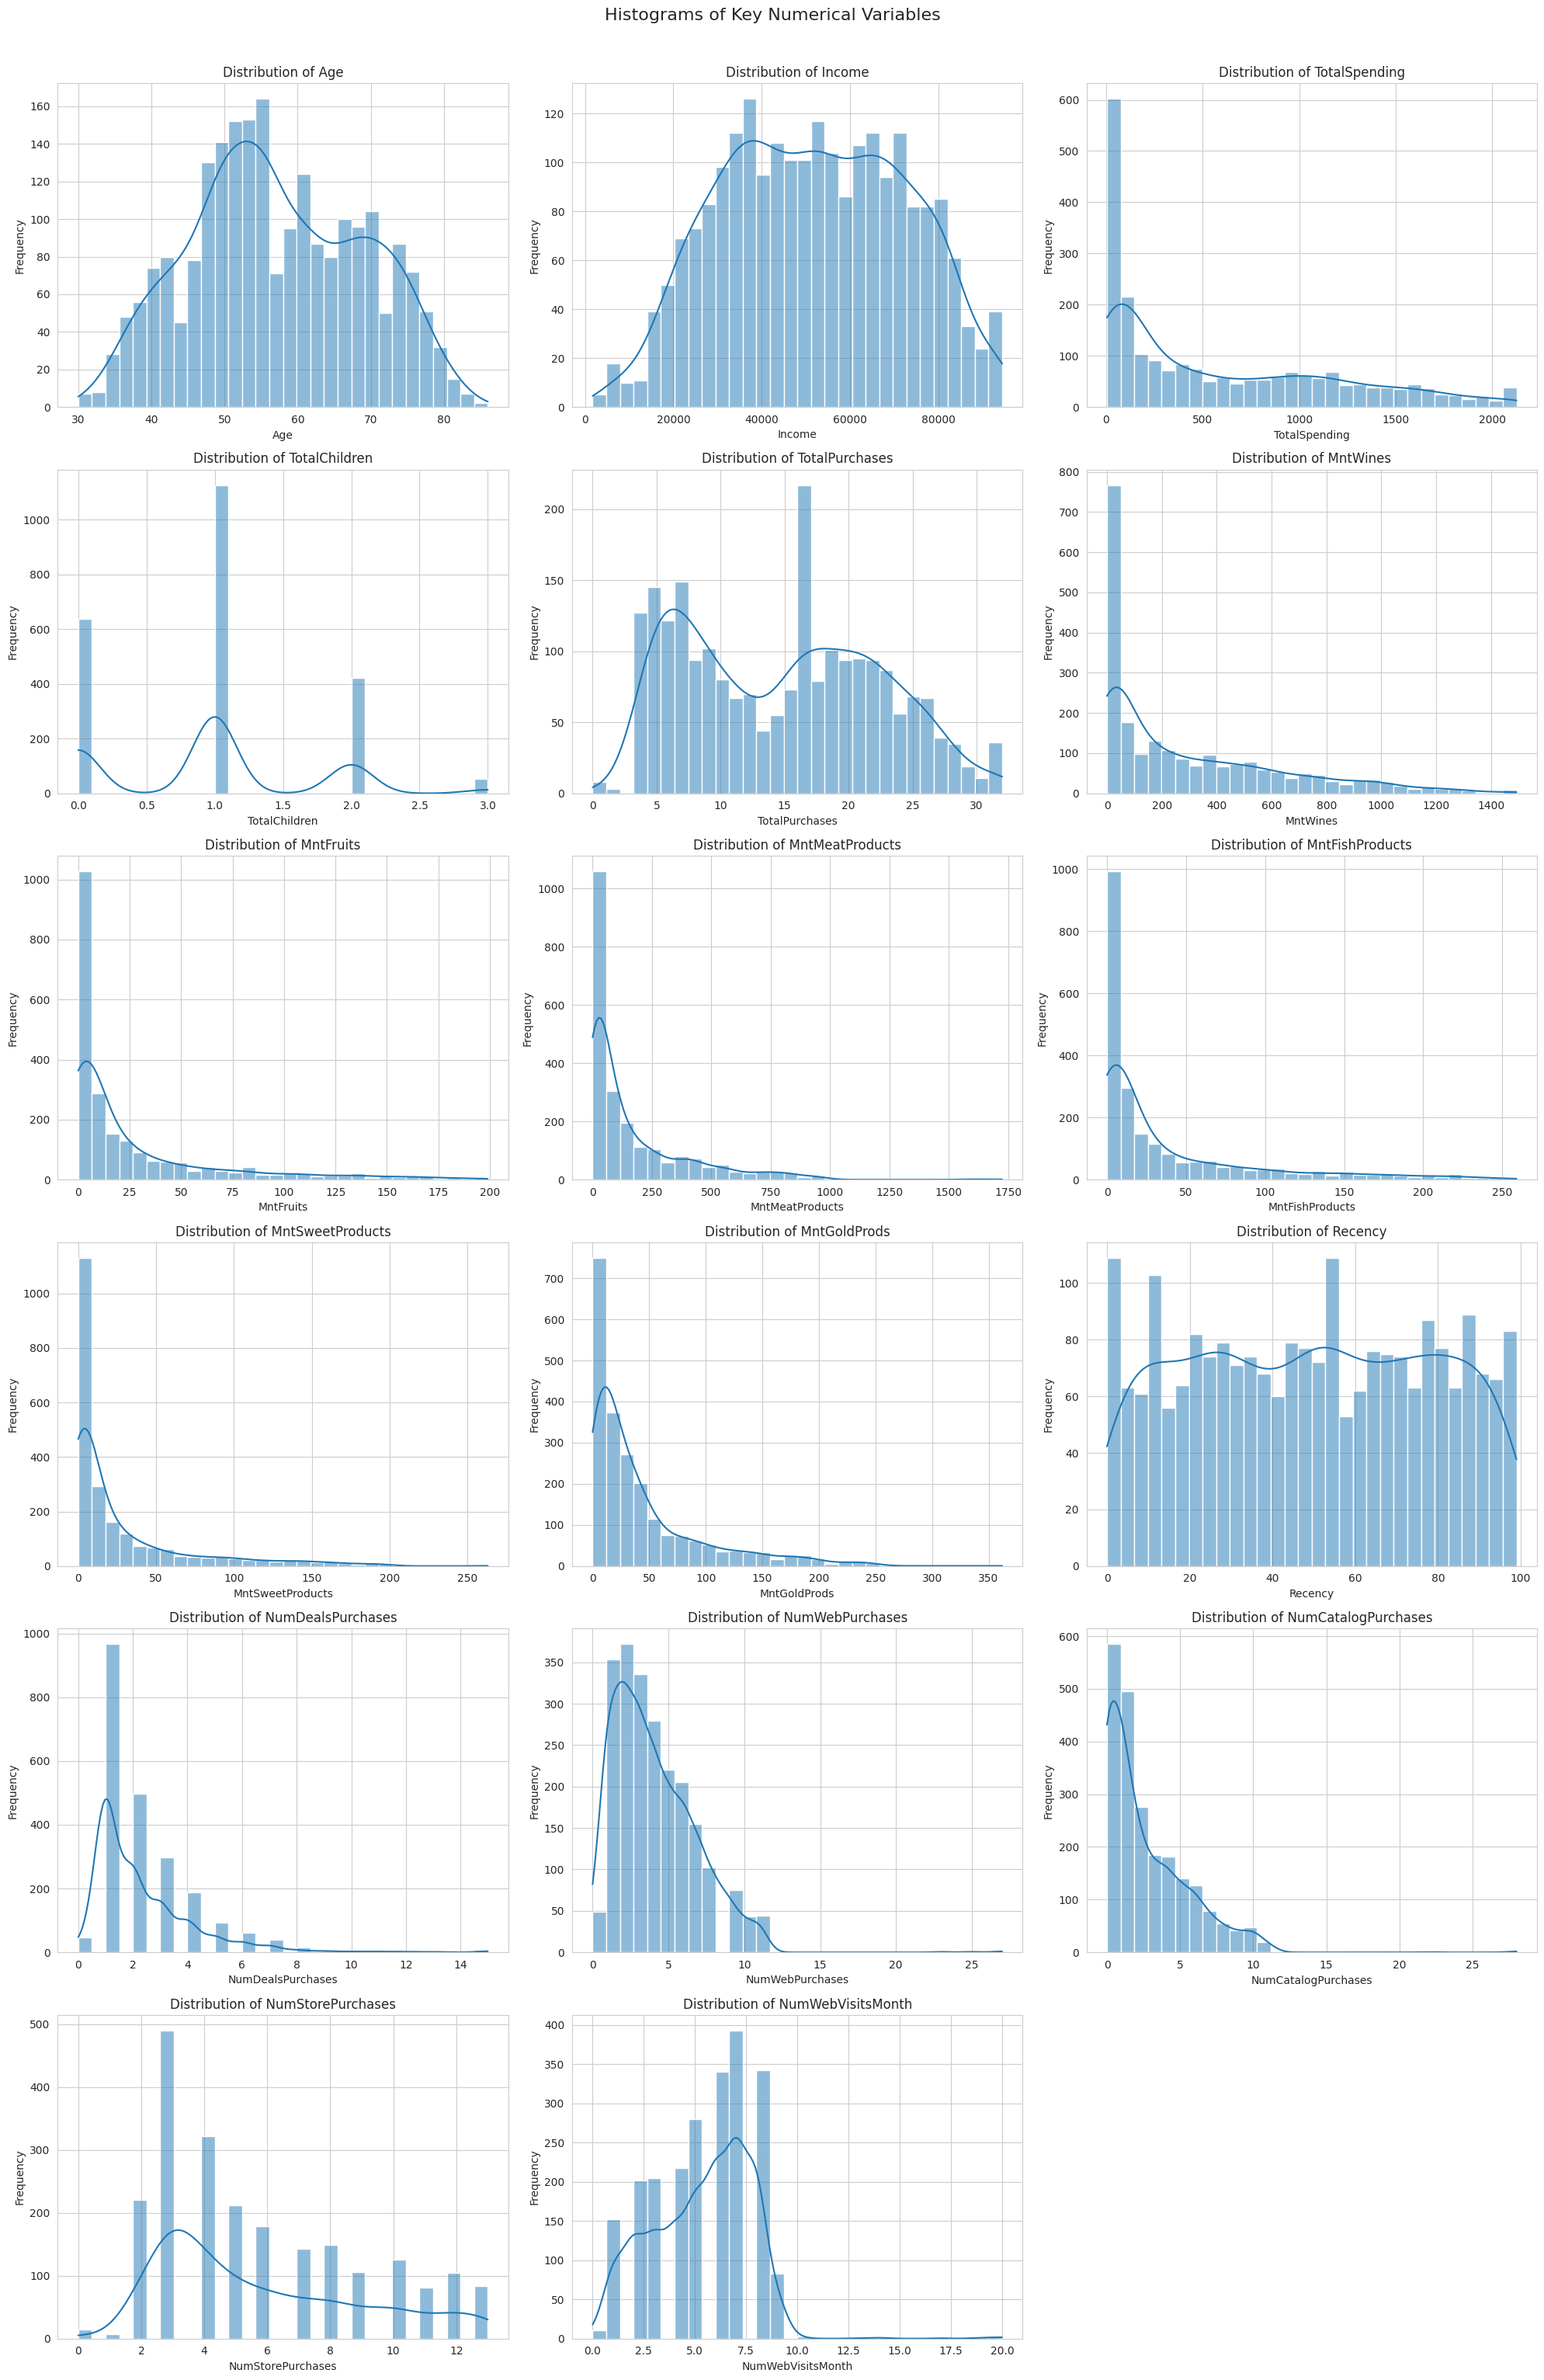

In [41]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols_to_visualize):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid as needed, e.g., 6 rows and 3 columns for 17 plots
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
I have already generated histograms. Now, I will create a series of box plots for the same numerical columns to visualize their distributions and confirm outlier treatment, as per the instructions.



/tmp/ipython-input-1746085213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')
/tmp/ipython-input-1746085213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')
/tmp/ipython-input-1746085213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')
/tmp/ipython-input-1746085213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

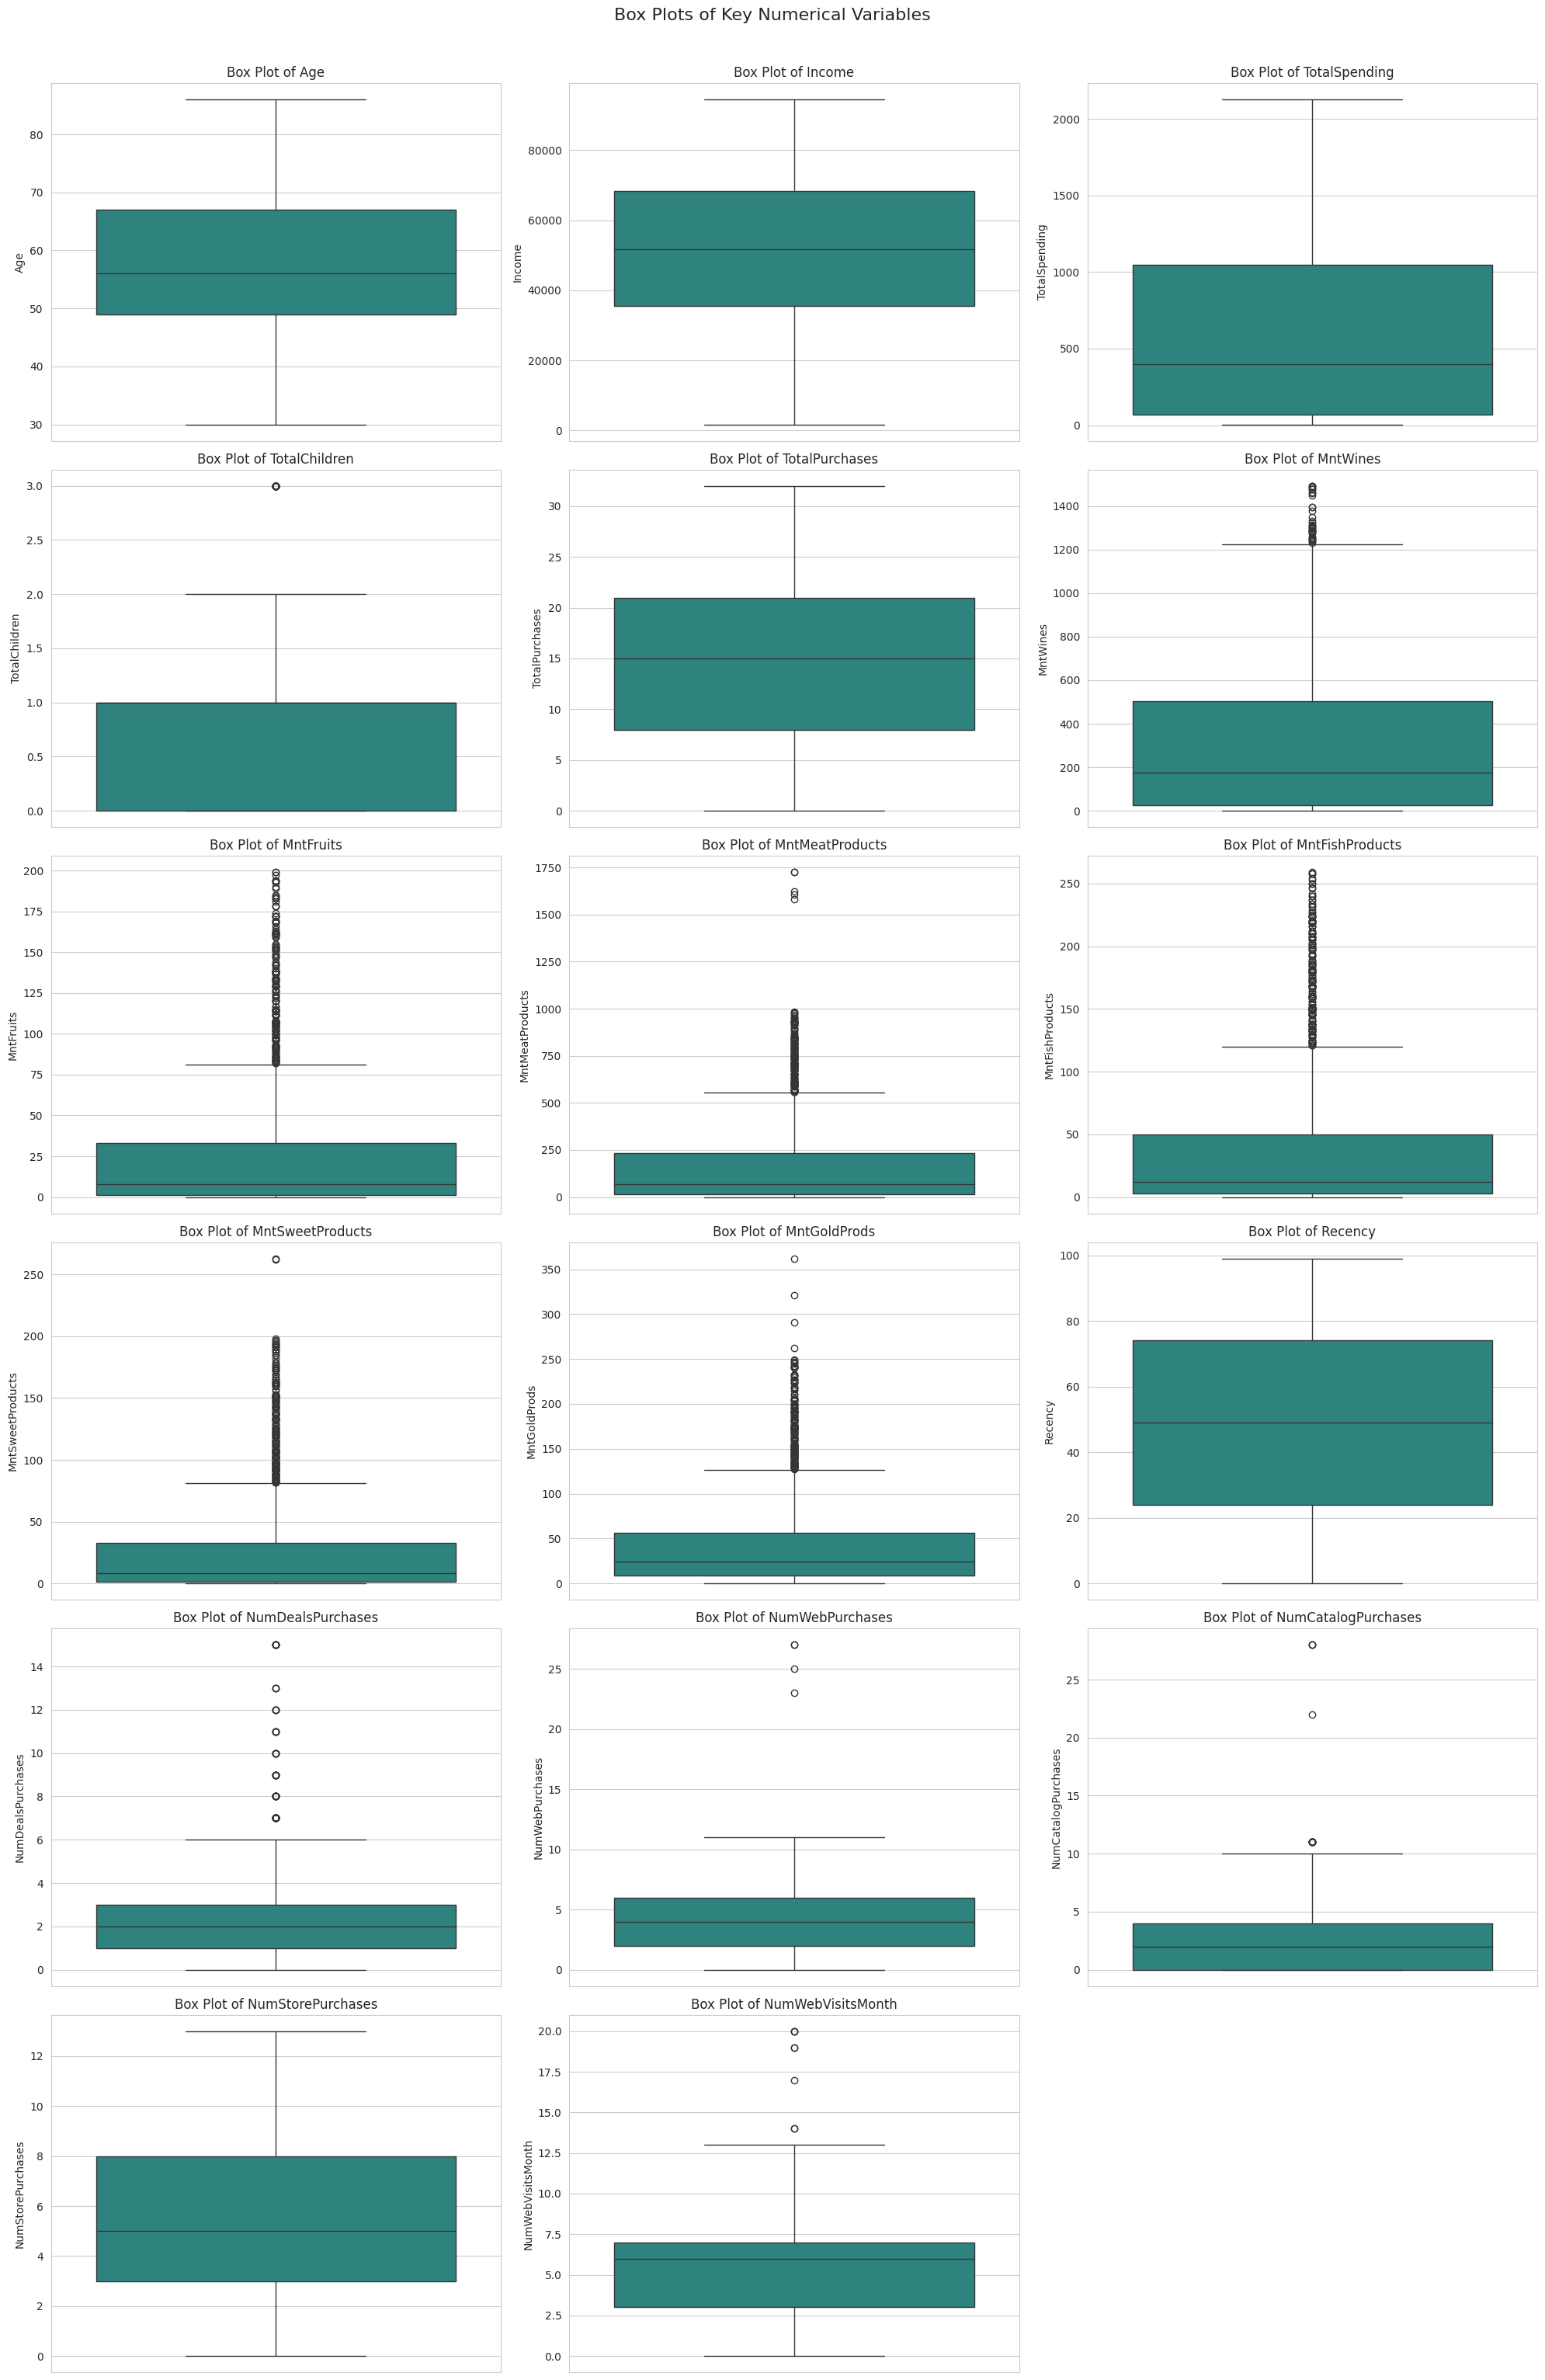

In [42]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols_to_visualize):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(data=df, y=col, palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` about using `palette` without assigning `hue` in `sns.boxplot`. Since these are single-variable box plots (only `y` is specified), `palette` is not appropriately used. I will remove the `palette` argument to prevent the warning.



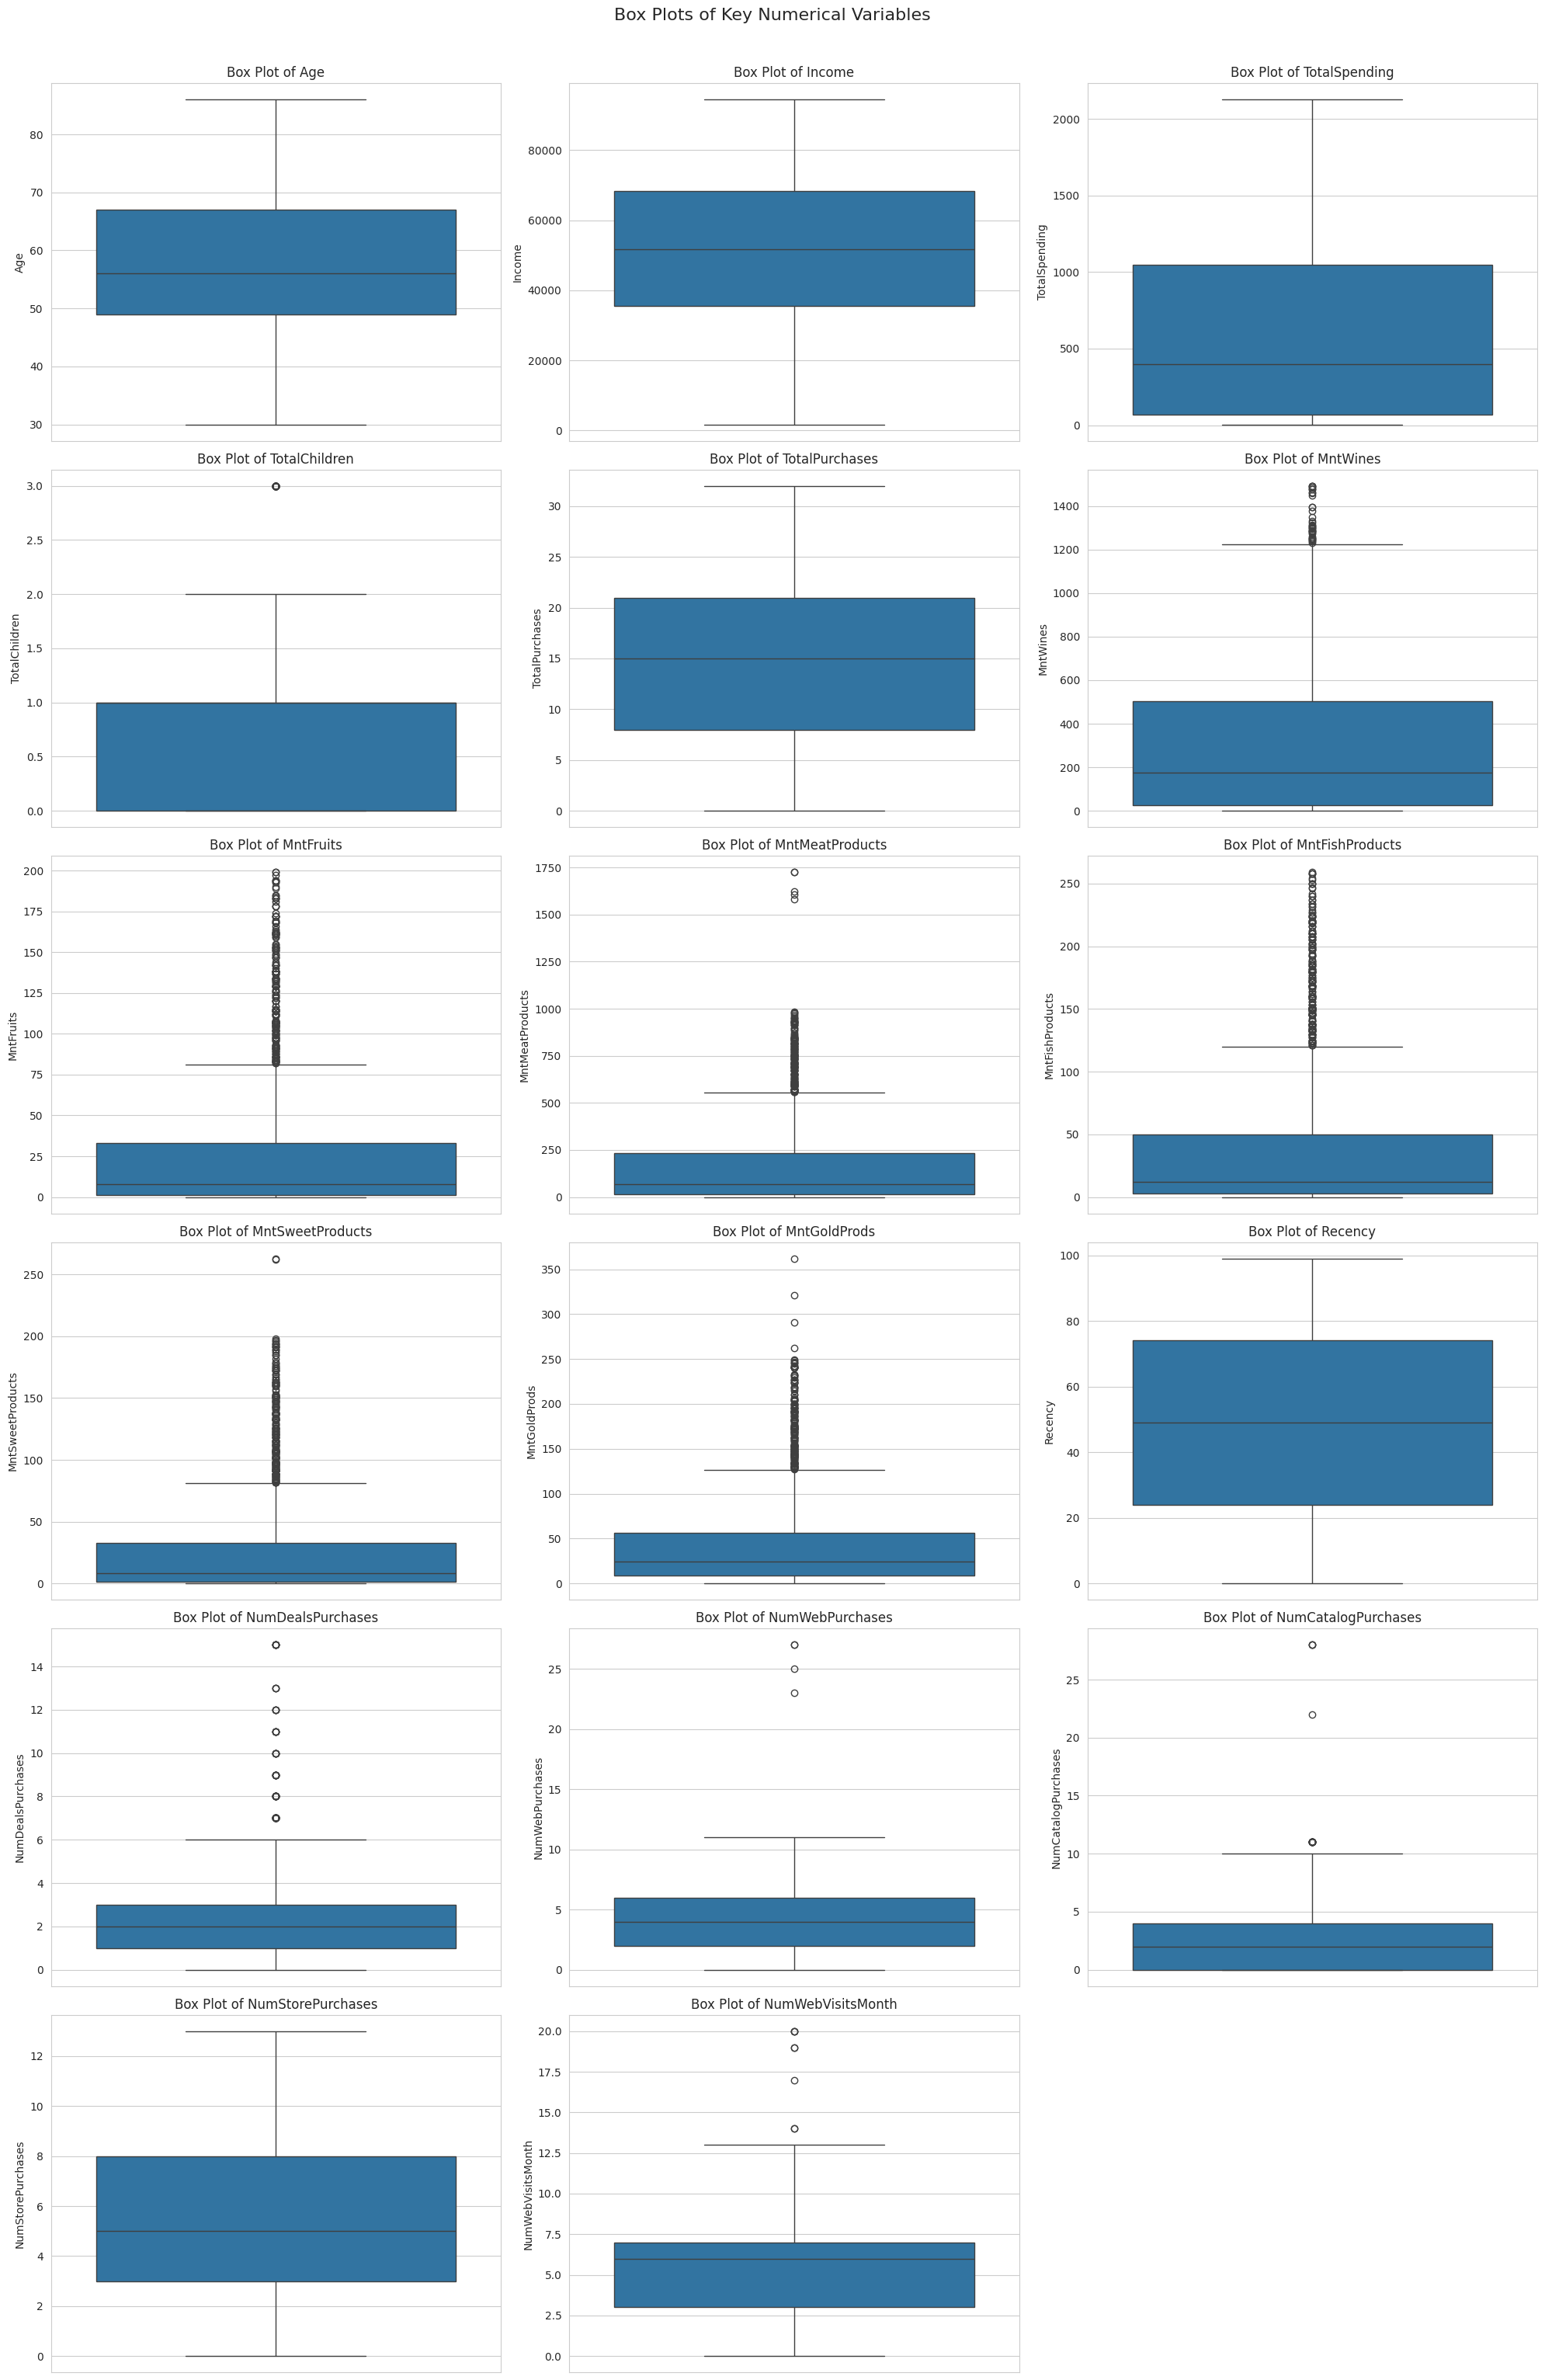

In [43]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols_to_visualize):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()

## Generate correlation heatmap

### Subtask:
Generate a heatmap to illustrate the correlation matrix between different numerical variables.


**Reasoning**:
I will define a list of all numerical and ordinally encoded columns specified in the instructions for correlation analysis.



In [44]:
correlation_cols = [
    'Education', 'Age', 'Income', 'TotalSpending', 'TotalChildren', 'TotalPurchases',
    'Recency', 'NumWebVisitsMonth',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'
]

print("List of columns for correlation analysis defined.")

List of columns for correlation analysis defined.


**Reasoning**:
Now that the list of relevant numerical and ordinally encoded columns has been defined, I will calculate the correlation matrix for these columns and then generate a heatmap to visualize the correlations, ensuring the plot is appropriately sized, includes annotations, and has a clear title, as specified in the instructions.



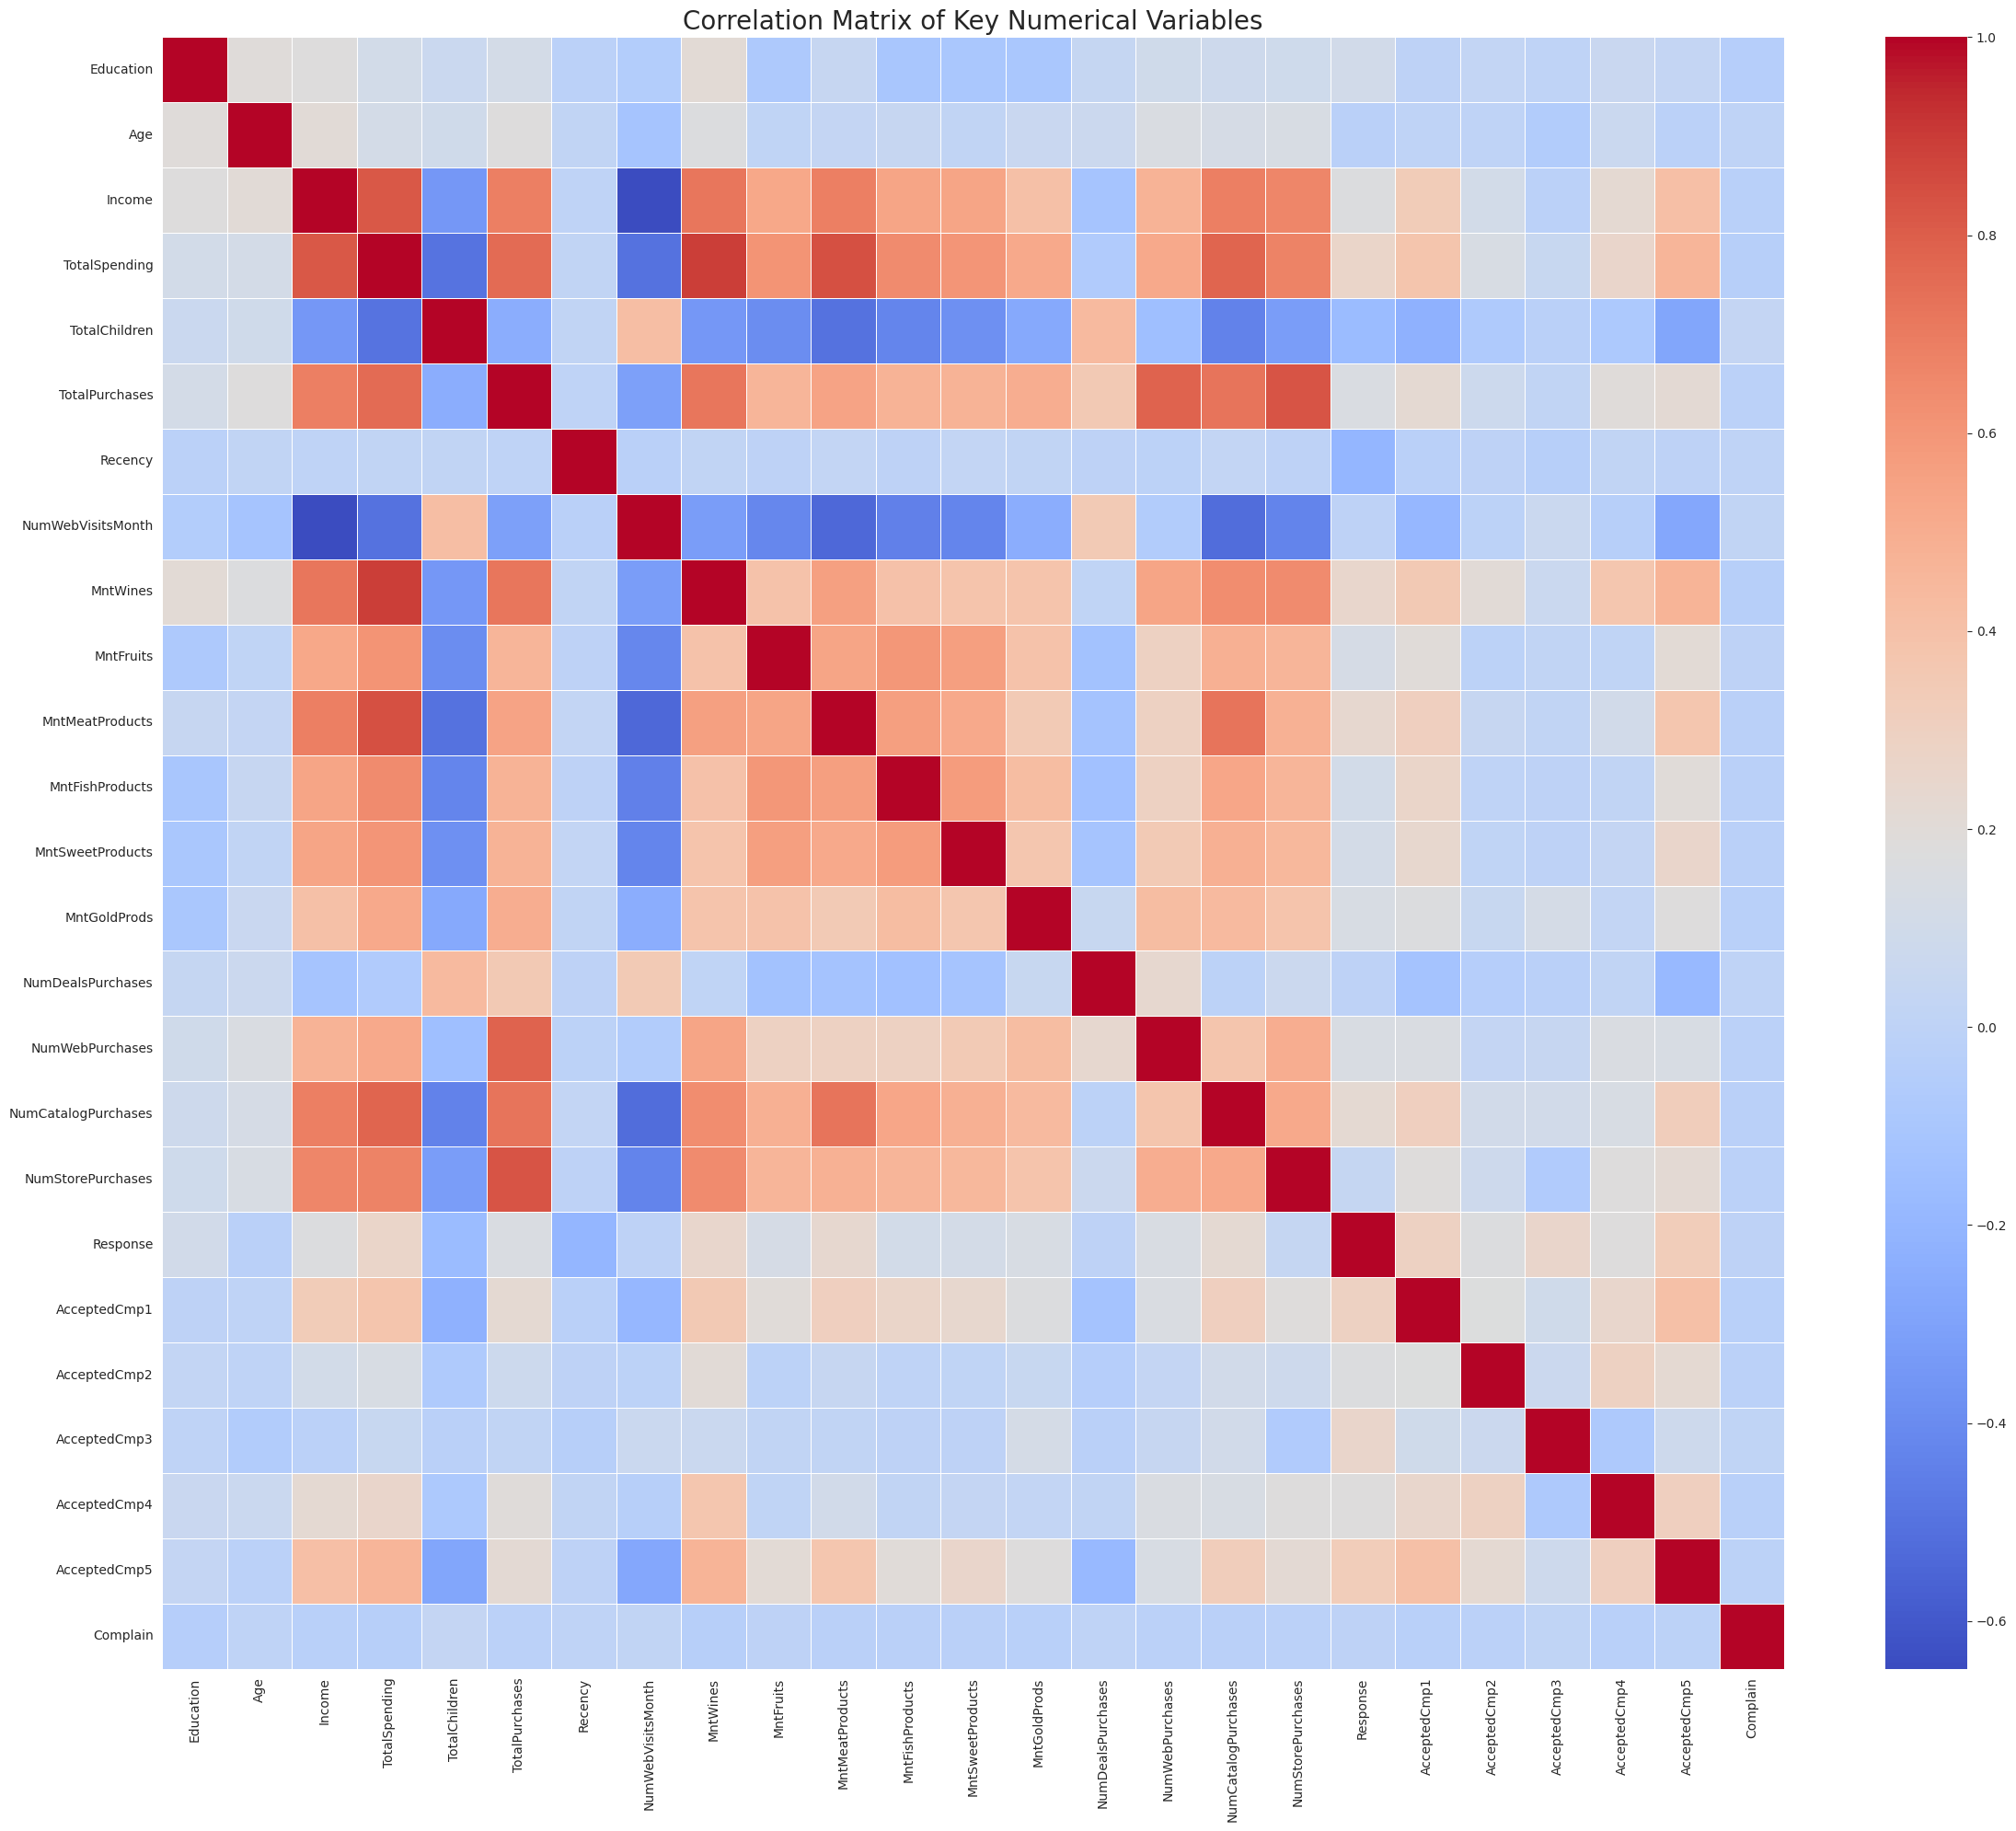

Correlation heatmap generated.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[correlation_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 20)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Variables', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Correlation heatmap generated.")

## Visualize top-performing and lowest-revenue products

### Subtask:
Visualize top-performing products (highest revenue) and those with the lowest revenue.


**Reasoning**:
I will calculate the total revenue for each product category by summing the respective spending columns, create a Series from these sums, and then sort them for visualization, as specified in the instructions.



In [46]:
product_spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total revenue for each product category
product_revenue = df[product_spending_cols].sum().sort_values(ascending=False)

print("Total revenue per product category (sorted):")
print(product_revenue)

Total revenue per product category (sorted):
MntWines            680038
MntMeatProducts     373393
MntGoldProds         98358
MntFishProducts      83939
MntSweetProducts     60553
MntFruits            58767
dtype: int64


**Reasoning**:
Now that the total revenue for each product category has been calculated and sorted, I will generate a bar chart to visualize these revenues, ensuring it has a descriptive title and appropriate axis labels as per the instructions.



/tmp/ipython-input-1329677771.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')


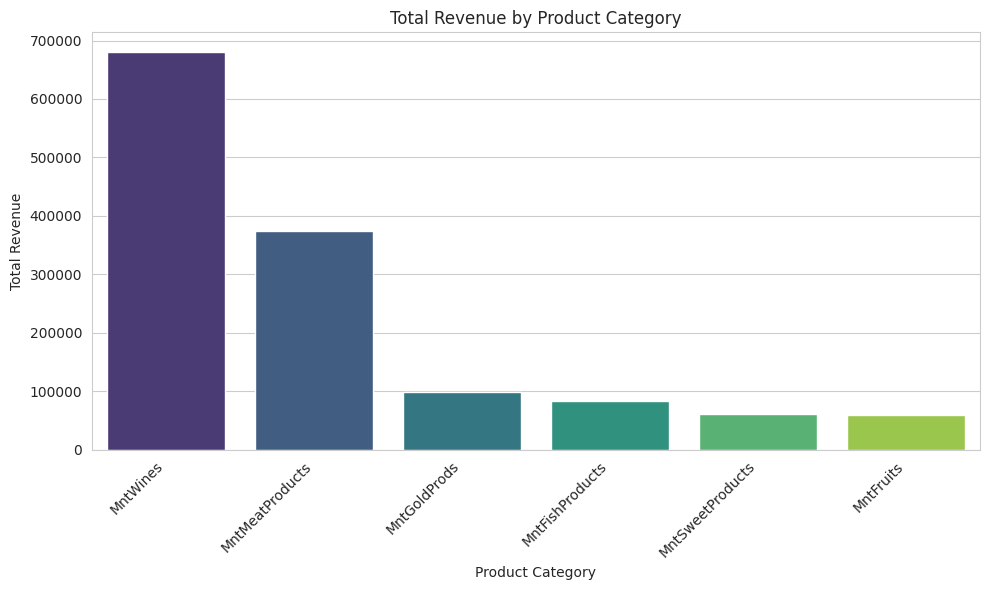

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `palette` without assigning `hue` in `sns.barplot`. To address this, I will convert the `product_revenue` Series into a DataFrame and explicitly assign the x-axis variable to `hue` while setting `legend=False` to ensure compatibility with future seaborn versions and remove the warning.



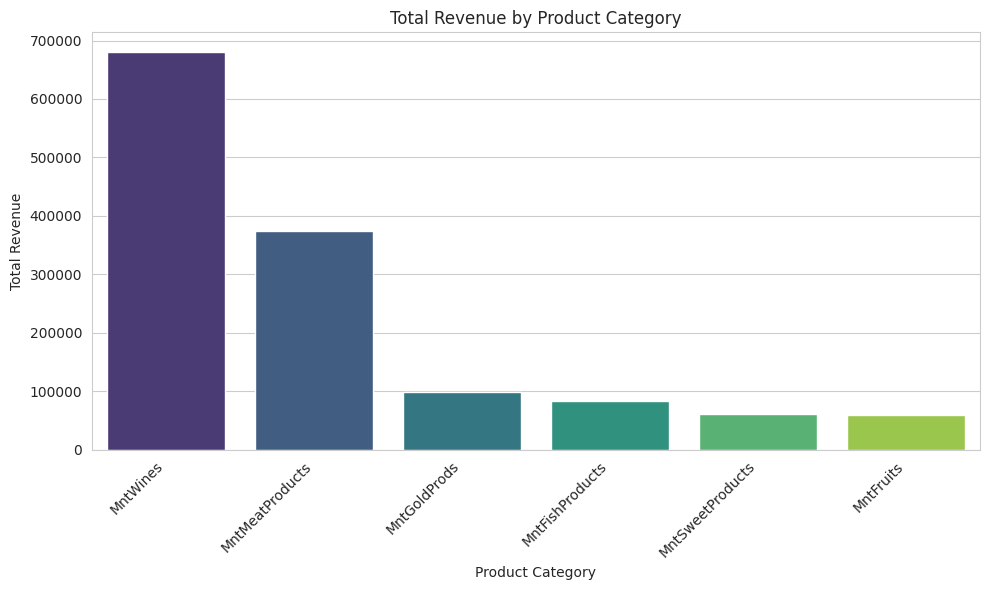

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Convert the product_revenue Series to a DataFrame for easier plotting with hue
product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Product Category', 'Total Revenue']

plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue_df, x='Product Category', y='Total Revenue', hue='Product Category', legend=False, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Examine correlation between Age and Response rate

### Subtask:
Examine the correlation between customers' 'Age' and the 'Response' rate of the last campaign using appropriate visualization.


**Reasoning**:
I will create a box plot to visualize the distribution of 'Age' for customers based on their 'Response' to the last campaign, as specified in the instructions, to examine their correlation.



/tmp/ipython-input-748292295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Response', y='Age', palette='coolwarm')


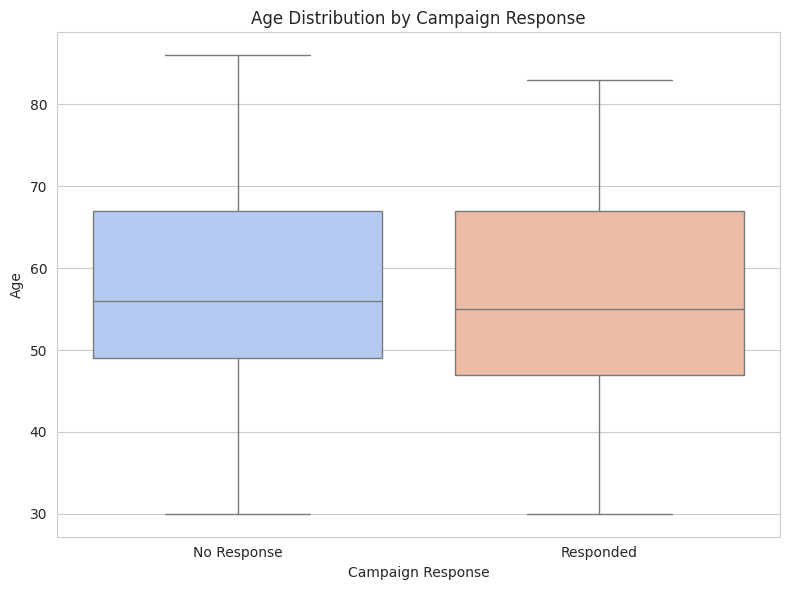

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Response', y='Age', palette='coolwarm')
plt.title('Age Distribution by Campaign Response')
plt.xlabel('Campaign Response')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Response', 'Responded'])
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `palette` without assigning `hue` in `sns.boxplot`. To address this, I will explicitly assign the `x` variable (`Response`) to `hue` and set `legend=False`, as suggested by the warning.



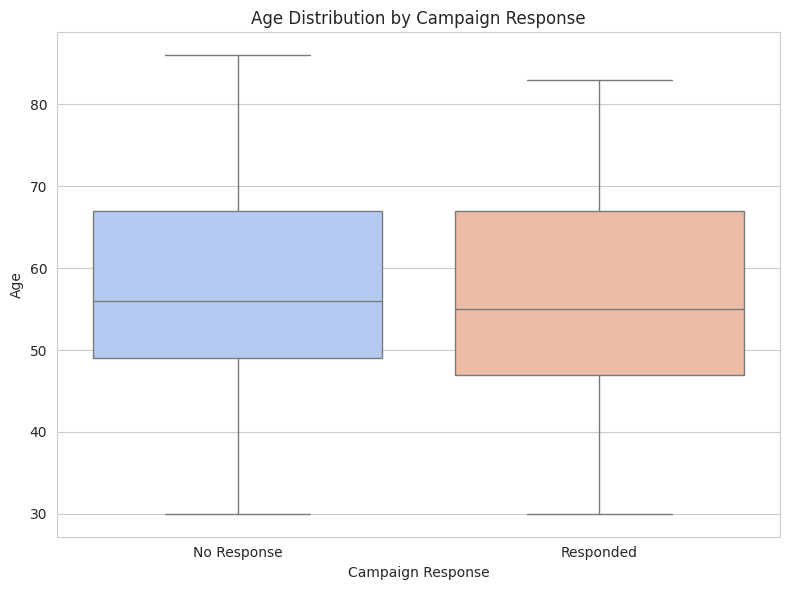

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Response', y='Age', hue='Response', legend=False, palette='coolwarm')
plt.title('Age Distribution by Campaign Response')
plt.xlabel('Campaign Response')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No Response', 'Responded'])
plt.tight_layout()
plt.show()

## Determine the 'Country' with the highest number of customers who accepted the last campaign and visualize it.

### Subtask:
Identify the country with the most accepted campaigns ('Response' = 1) and visualize this finding using a bar plot.


**Reasoning**:
I will filter the DataFrame to include only customers who responded to the last campaign (Response = 1) and then count the occurrences of each country to identify the country with the most accepted campaigns, as per the first two instructions.



In [51]:
responded_customers = df[df['Response'] == 1]

country_response_counts = responded_customers['Country_SP'].sum() + \
                          responded_customers['Country_CA'].sum() + \
                          responded_customers['Country_GER'].sum() + \
                          responded_customers['Country_IND'].sum() + \
                          responded_customers['Country_ME'].sum() + \
                          responded_customers['Country_SA'].sum() + \
                          responded_customers['Country_US'].sum()


# Create a Series with actual country names and their counts for plotting.
# Assuming the one-hot encoded columns correspond to the respective countries.
country_response_counts = responded_customers[[col for col in df.columns if 'Country_' in col]].sum()
country_response_counts.index = country_response_counts.index.str.replace('Country_', '')

print("Number of campaign acceptances per country:")
print(country_response_counts.sort_values(ascending=False))

Number of campaign acceptances per country:
SP     176
SA      52
CA      38
GER     17
IND     13
US      13
ME       2
dtype: int64


**Reasoning**:
Now that the number of campaign acceptances per country has been calculated, I will generate a bar plot to visualize this finding, ensuring the plot has a descriptive title, appropriate axis labels, and clear country names as per the instructions.



/tmp/ipython-input-3711474634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_response_counts.index, y=country_response_counts.values, palette='viridis')


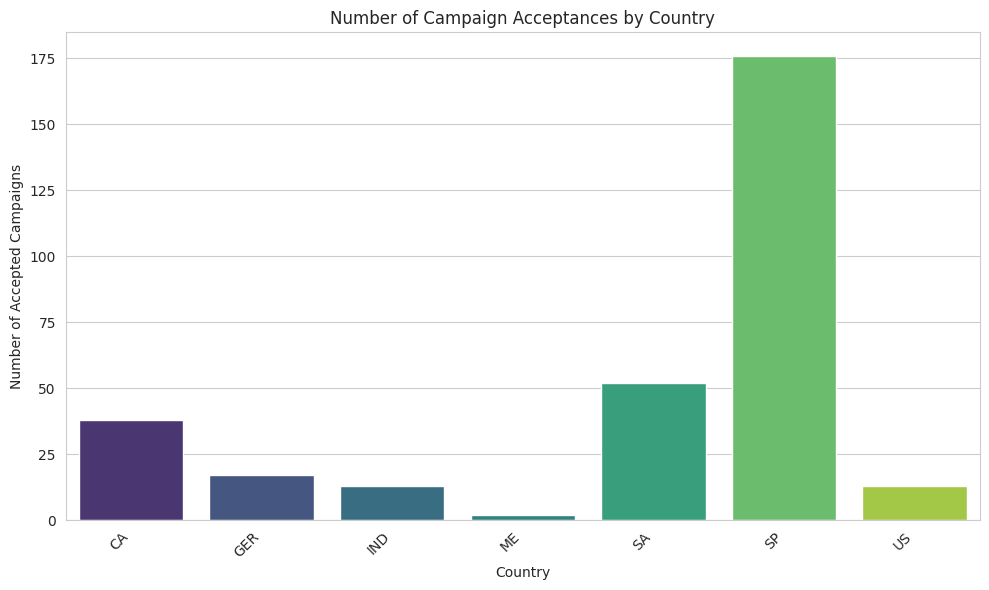

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(x=country_response_counts.index, y=country_response_counts.values, palette='viridis')
plt.title('Number of Campaign Acceptances by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `palette` without assigning `hue` in `sns.barplot`. To address this, I will convert the `country_response_counts` Series into a DataFrame and explicitly assign the x-axis variable to `hue` while setting `legend=False` to ensure compatibility with future seaborn versions and remove the warning.



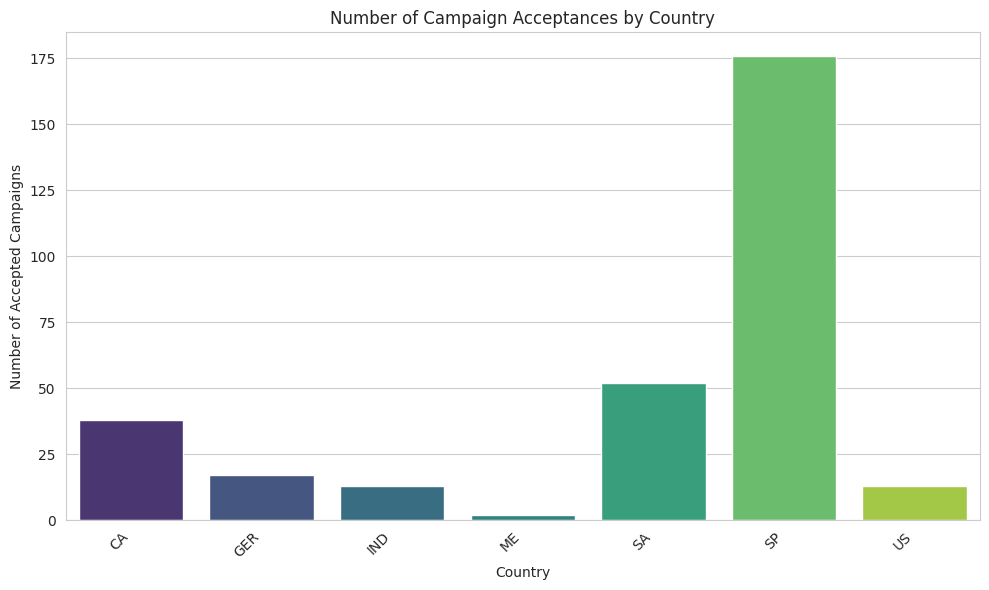

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Convert the country_response_counts Series to a DataFrame for easier plotting with hue
country_response_df = country_response_counts.reset_index()
country_response_df.columns = ['Country', 'Number of Accepted Campaigns']

plt.figure(figsize=(10, 6))
sns.barplot(data=country_response_df, x='Country', y='Number of Accepted Campaigns', hue='Country', legend=False, palette='viridis')
plt.title('Number of Campaign Acceptances by Country')
plt.xlabel('Country')
plt.ylabel('Number of Accepted Campaigns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Investigate TotalChildren and TotalSpending

Investigate if there is a discernible pattern in 'TotalChildren' and 'TotalSpending' using scatter or box plots.


will generate two plots, a scatter plot and a box plot, to visualize the relationship between 'TotalChildren' and 'TotalSpending' as per the instructions, which will help in identifying any patterns or distributions.



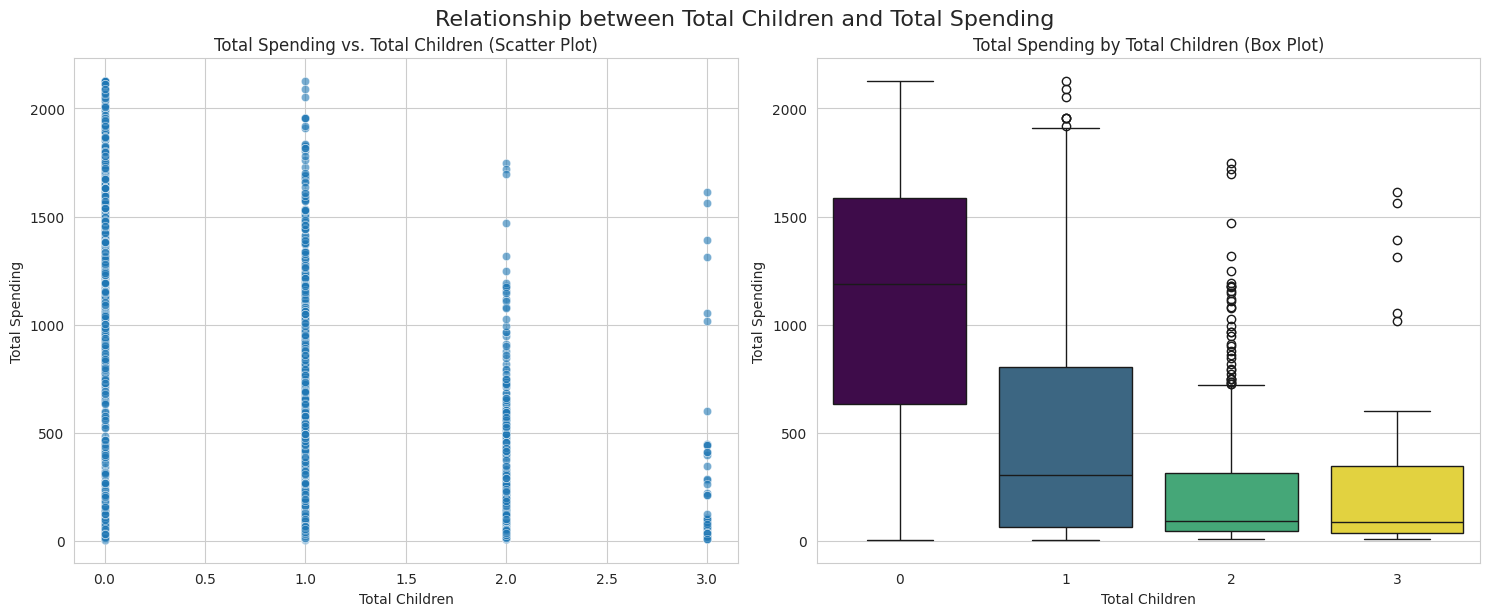

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(15, 6))

# Scatter plot for TotalSpending vs. TotalChildren
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='TotalChildren', y='TotalSpending', alpha=0.6)
plt.title('Total Spending vs. Total Children (Scatter Plot)')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')

# Box plot for TotalSpending by TotalChildren
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='TotalChildren', y='TotalSpending', hue='TotalChildren', legend=False, palette='viridis')
plt.title('Total Spending by Total Children (Box Plot)')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')

plt.tight_layout()
plt.suptitle('Relationship between Total Children and Total Spending', y=1.02, fontsize=16)
plt.show()

## Hypothesis Testing: Age vs. Shopping Preferences

Test the hypothesis that older individuals may lean toward traditional in-store shopping preferences by comparing 'NumStorePurchases' and 'NumWebPurchases' across different age groups.


will calculate the median age to divide the DataFrame into 'Young' and 'Old' age groups, and then calculate the mean 'NumStorePurchases' and 'NumWebPurchases' for each group, as per the first two instructions for hypothesis testing.



In [55]:
from scipy import stats

# 1. Divide the DataFrame df into two age groups
median_age = df['Age'].median()

df_young = df[df['Age'] < median_age]
df_old = df[df['Age'] >= median_age]

print(f"Median Age: {median_age}")
print(f"Number of customers in Young group: {len(df_young)}")
print(f"Number of customers in Old group: {len(df_old)}")

# 2. For each age group, calculate the mean 'NumStorePurchases' and 'NumWebPurchases'
mean_store_purchases_young = df_young['NumStorePurchases'].mean()
mean_web_purchases_young = df_young['NumWebPurchases'].mean()

mean_store_purchases_old = df_old['NumStorePurchases'].mean()
mean_web_purchases_old = df_old['NumWebPurchases'].mean()

print(f"\nMean Store Purchases (Young): {mean_store_purchases_young:.2f}")
print(f"Mean Web Purchases (Young): {mean_web_purchases_young:.2f}")
print(f"Mean Store Purchases (Old): {mean_store_purchases_old:.2f}")
print(f"Mean Web Purchases (Old): {mean_web_purchases_old:.2f}")

Median Age: 56.0
Number of customers in Young group: 1087
Number of customers in Old group: 1150

Mean Store Purchases (Young): 5.33
Mean Web Purchases (Young): 3.68
Mean Store Purchases (Old): 6.23
Mean Web Purchases (Old): 4.47


Now that the age groups and mean purchases have been calculated, I will perform independent samples t-tests to compare the mean 'NumStorePurchases' and 'NumWebPurchases' between the 'Young' and 'Old' groups, as per instructions 3 and 4.



In [73]:
from scipy import stats

# 3. Perform an independent samples t-test for NumStorePurchases
t_statistic_store, p_value_store = stats.ttest_ind(df_young['NumStorePurchases'], df_old['NumStorePurchases'])
print(f"\nT-test for NumStorePurchases: t-statistic = {t_statistic_store:.2f}, p-value = {p_value_store:.3f}")

# 4. Perform an independent samples t-test for NumWebPurchases
t_statistic_web, p_value_web = stats.ttest_ind(df_young['NumWebPurchases'], df_old['NumWebPurchases'])
print(f"T-test for NumWebPurchases: t-statistic = {t_statistic_web:.2f}, p-value = {p_value_web:.3f}")

# 5. Interpret findings based on p-values
significance_level = 0.05

print("\nInterpretation of Hypothesis Tests:")
if p_value_store < significance_level:
    print(f"- There is a significant difference in 'NumStorePurchases' between young and old age groups (p-value={p_value_store:.3f}).")
    if mean_store_purchases_old > mean_store_purchases_young:
        print("  Older individuals tend to have more in-store purchases.")
    else:
        print("  Younger individuals tend to have more in-store purchases.")
else:
    print(f"- There is no significant difference in 'NumStorePurchases' between young and old age groups (p-value={p_value_store:.3f}).")

if p_value_web < significance_level:
    print(f"- There is a significant difference in 'NumWebPurchases' between young and old age groups (p-value={p_value_web:.3f}).")
    if mean_web_purchases_old > mean_web_purchases_young:
        print("  Older individuals tend to have more web purchases.")
    else:
        print("  Younger individuals tend to have more web purchases.")
else:
    print(f"- There is no significant difference in 'NumWebPurchases' between young and old age groups (p-value={p_value_web:.3f}).")


T-test for NumStorePurchases: t-statistic = -6.63, p-value = 0.000
T-test for NumWebPurchases: t-statistic = -6.81, p-value = 0.000

Interpretation of Hypothesis Tests:
- There is a significant difference in 'NumStorePurchases' between young and old age groups (p-value=0.000).
  Older individuals tend to have more in-store purchases.
- There is a significant difference in 'NumWebPurchases' between young and old age groups (p-value=0.000).
  Older individuals tend to have more web purchases.


## Hypothesis Testing: Children vs. Shopping Preferences

Test the hypothesis that customers with children may prefer online shopping (higher 'NumWebPurchases') over in-store shopping ('NumStorePurchases') due to time constraints.


will divide the DataFrame into two groups: customers with children (`TotalChildren` > 0) and customers without children (`TotalChildren` == 0), as per the first instruction.



In [57]:
from scipy import stats

# 1. Divide the DataFrame df into two groups: customers with children and customers without children
df_with_children = df[df['TotalChildren'] > 0]
df_no_children = df[df['TotalChildren'] == 0]

print(f"Number of customers with children: {len(df_with_children)}")
print(f"Number of customers without children: {len(df_no_children)}")

Number of customers with children: 1600
Number of customers without children: 637


Now that the DataFrame has been divided into groups, I will calculate the mean 'NumWebPurchases' and 'NumStorePurchases' for both the 'customers with children' and 'customers without children' groups, as per the second instruction.



In [58]:
mean_web_purchases_with_children = df_with_children['NumWebPurchases'].mean()
mean_store_purchases_with_children = df_with_children['NumStorePurchases'].mean()

mean_web_purchases_no_children = df_no_children['NumWebPurchases'].mean()
mean_store_purchases_no_children = df_no_children['NumStorePurchases'].mean()

print(f"\nMean Web Purchases (with children): {mean_web_purchases_with_children:.2f}")
print(f"Mean Store Purchases (with children): {mean_store_purchases_with_children:.2f}")
print(f"Mean Web Purchases (no children): {mean_web_purchases_no_children:.2f}")
print(f"Mean Store Purchases (no children): {mean_store_purchases_no_children:.2f}")


Mean Web Purchases (with children): 3.96
Mean Store Purchases (with children): 5.21
Mean Web Purchases (no children): 4.39
Mean Store Purchases (no children): 7.27


Now that the mean purchases have been calculated for both groups, I will perform independent samples t-tests to compare the mean 'NumWebPurchases' and 'NumStorePurchases' between the 'with children' and 'no children' groups, as per instructions 3 and 4. I will then interpret the findings based on the p-values as per instruction 5.



In [59]:
from scipy import stats

# 3. Perform independent samples t-tests to compare the mean 'NumWebPurchases' between the two groups
t_statistic_web_children, p_value_web_children = stats.ttest_ind(df_with_children['NumWebPurchases'], df_no_children['NumWebPurchases'])
print(f"\nT-test for NumWebPurchases (children vs. no children): t-statistic = {t_statistic_web_children:.2f}, p-value = {p_value_web_children:.3f}")

# 4. Perform independent samples t-tests to compare the mean 'NumStorePurchases' between the two groups
t_statistic_store_children, p_value_store_children = stats.ttest_ind(df_with_children['NumStorePurchases'], df_no_children['NumStorePurchases'])
print(f"T-test for NumStorePurchases (children vs. no children): t-statistic = {t_statistic_store_children:.2f}, p-value = {p_value_store_children:.3f}")

# 5. Interpret findings based on p-values
significance_level = 0.05

print("\nInterpretation of Hypothesis Tests (Children vs. Shopping Preferences):")
if p_value_web_children < significance_level:
    print(f"- There is a significant difference in 'NumWebPurchases' between customers with and without children (p-value={p_value_web_children:.3f}).")
    if mean_web_purchases_with_children > mean_web_purchases_no_children:
        print("  Customers with children tend to have more web purchases.")
    else:
        print("  Customers without children tend to have more web purchases.")
else:
    print(f"- There is no significant difference in 'NumWebPurchases' between customers with and without children (p-value={p_value_web_children:.3f}).")

if p_value_store_children < significance_level:
    print(f"- There is a significant difference in 'NumStorePurchases' between customers with and without children (p-value={p_value_store_children:.3f}).")
    if mean_store_purchases_with_children > mean_store_purchases_no_children:
        print("  Customers with children tend to have more in-store purchases.")
    else:
        print("  Customers without children tend to have more in-store purchases.")
else:
    print(f"- There is no significant difference in 'NumStorePurchases' between customers with and without children (p-value={p_value_store_children:.3f}).")


T-test for NumWebPurchases (children vs. no children): t-statistic = -3.30, p-value = 0.001
T-test for NumStorePurchases (children vs. no children): t-statistic = -14.14, p-value = 0.000

Interpretation of Hypothesis Tests (Children vs. Shopping Preferences):
- There is a significant difference in 'NumWebPurchases' between customers with and without children (p-value=0.001).
  Customers without children tend to have more web purchases.
- There is a significant difference in 'NumStorePurchases' between customers with and without children (p-value=0.000).
  Customers without children tend to have more in-store purchases.


## Hypothesis Testing: Cannibalization of Store Sales

Test the hypothesis that sales at physical stores may face the risk of cannibalization by alternative distribution channels by analyzing the relationship between 'NumStorePurchases' and 'NumWebPurchases'/'NumCatalogPurchases'.



 will calculate the Pearson correlation coefficient between 'NumStorePurchases' and 'NumWebPurchases' as per the first instruction.



In [60]:
correlation_store_web = df['NumStorePurchases'].corr(df['NumWebPurchases'], method='pearson')

print(f"Pearson correlation between NumStorePurchases and NumWebPurchases: {correlation_store_web:.3f}")

Pearson correlation between NumStorePurchases and NumWebPurchases: 0.502



Now that the correlation between 'NumStorePurchases' and 'NumWebPurchases' has been calculated, I will calculate the Pearson correlation coefficient between 'NumStorePurchases' and 'NumCatalogPurchases', as per the second instruction.



In [61]:
correlation_store_catalog = df['NumStorePurchases'].corr(df['NumCatalogPurchases'], method='pearson')

print(f"Pearson correlation between NumStorePurchases and NumCatalogPurchases: {correlation_store_catalog:.3f}")

Pearson correlation between NumStorePurchases and NumCatalogPurchases: 0.519


The Pearson correlation coefficient between 'NumStorePurchases' and 'NumWebPurchases' is **0.502**, indicating a moderately positive correlation. The Pearson correlation coefficient between 'NumStorePurchases' and 'NumCatalogPurchases' is **0.519**, also showing a moderately positive correlation.

**Interpretation of Results:**

-   **No Strong Evidence of Cannibalization:** A strong negative correlation would suggest that as purchases from alternative channels (web or catalog) increase, store purchases decrease, indicating cannibalization. However, the observed moderate positive correlations suggest the opposite. It implies that customers who buy more from web or catalog channels also tend to buy more from physical stores.
-   **Synergy or Complementary Behavior:** This positive correlation might indicate a synergy or complementary relationship between these channels. Customers who are engaged with the brand through one channel might be more likely to engage through others, rather than substituting one for the other. For example, web/catalog browsing might inform in-store purchases, or in-store experiences might drive online purchases.
-   **Implications for Marketing Strategies:**
    *   **Integrated Multi-Channel Strategy:** Instead of viewing channels as competitors, businesses should foster an integrated multi-channel strategy. This means ensuring a consistent brand experience across all touchpoints.
    *   **Cross-Promotion:** Marketing efforts should leverage cross-promotional opportunities. For example, offering online-exclusive deals that can be picked up in-store, or promoting website/catalog options within physical stores.
    *   **Customer Journey Analysis:** Further analysis of the customer journey could reveal how customers interact with different channels over time and how they influence each other. This can help optimize the allocation of marketing resources.
    *   **Targeted Campaigns:** While overall correlation is positive, there might be specific customer segments where cannibalization does occur. More granular analysis could identify these segments for targeted interventions.

The Pearson correlation coefficient between 'NumStorePurchases' and 'NumWebPurchases' is **0.502**, indicating a moderately positive correlation. The Pearson correlation coefficient between 'NumStorePurchases' and 'NumCatalogPurchases' is **0.519**, also showing a moderately positive correlation.

**Interpretation of Results:**

-   **No Strong Evidence of Cannibalization:** A strong negative correlation would suggest that as purchases from alternative channels (web or catalog) increase, store purchases decrease, indicating cannibalization. However, the observed moderate positive correlations suggest the opposite. It implies that customers who buy more from web or catalog channels also tend to buy more from physical stores.
-   **Synergy or Complementary Behavior:** This positive correlation might indicate a synergy or complementary relationship between these channels. Customers who are engaged with the brand through one channel might be more likely to engage through others, rather than substituting one for the other. For example, web/catalog browsing might inform in-store purchases, or in-store experiences might drive online purchases.
-   **Implications for Marketing Strategies:**
    *   **Integrated Multi-Channel Strategy:** Instead of viewing channels as competitors, businesses should foster an integrated multi-channel strategy. This means ensuring a consistent brand experience across all touchpoints.
    *   **Cross-Promotion:** Marketing efforts should leverage cross-promotional opportunities. For example, offering online-exclusive deals that can be picked up in-store, or promoting website/catalog options within physical stores.
    *   **Customer Journey Analysis:** Further analysis of the customer journey could reveal how customers interact with different channels over time and how they influence each other. This can help optimize the allocation of marketing resources.
    *   **Targeted Campaigns:** While overall correlation is positive, there might be specific customer segments where cannibalization does occur. More granular analysis could identify these segments for targeted interventions.

## Hypothesis Testing: The United States significantly outperforms the rest of the world in total purchase volumes

Test the hypothesis that the United States significantly outperforms the rest of the world in total purchase volumes by comparing 'TotalPurchases' for 'Country' == 'US' vs. 'Country' != 'US'.


 will divide the DataFrame into two groups: `df_us` for customers with `Country_US == True` and `df_rest_of_world` for customers with `Country_US == False`, as per the first instruction.



In [77]:
from scipy import stats

# 1. Divide the DataFrame df into two groups: df_us and df_rest_of_world
df_us = df[df['Country_US'] == True]
df_rest_of_world = df[df['Country_US'] == False]

print(f"Number of customers in US group: {len(df_us)}")
print(f"Number of customers in Rest of World group: {len(df_rest_of_world)}")

Number of customers in US group: 109
Number of customers in Rest of World group: 2128


Now that the DataFrame has been divided into groups, I will calculate the mean 'TotalPurchases' for both the `df_us` and `df_rest_of_world` DataFrames, as per the second instruction.



In [76]:
mean_total_purchases_us = df_us['TotalPurchases'].mean()
mean_total_purchases_rest_of_world = df_rest_of_world['TotalPurchases'].mean()

print(f"Mean Total Purchases (US): {mean_total_purchases_us:.2f}")
print(f"Mean Total Purchases (Rest of World): {mean_total_purchases_rest_of_world:.2f}")

Mean Total Purchases (US): 15.94
Mean Total Purchases (Rest of World): 14.79



Now that the mean total purchases have been calculated for both groups, I will perform an independent samples t-test to compare the mean 'TotalPurchases' between the `df_us` and `df_rest_of_world` groups and then interpret the findings based on the p-value, as per instructions 3 and 4.



In [75]:
from scipy import stats

# 3. Perform an independent samples t-test for TotalPurchases
t_statistic_total_purchases, p_value_total_purchases = stats.ttest_ind(df_us['TotalPurchases'], df_rest_of_world['TotalPurchases'])
print(f"\nT-test for TotalPurchases (US vs. Rest of World): t-statistic = {t_statistic_total_purchases:.2f}, p-value = {p_value_total_purchases:.3f}")

# 4. Interpret findings based on p-values
significance_level = 0.05

print("\nInterpretation of Hypothesis Test (US vs. Rest of World - TotalPurchases):")
if p_value_total_purchases < significance_level:
    print(f"- There is a significant difference in 'TotalPurchases' between the US and the rest of the world (p-value={p_value_total_purchases:.3f}).")
    if mean_total_purchases_us > mean_total_purchases_rest_of_world:
        print("  The United States group tends to have higher total purchases.")
    else:
        print("  The Rest of World group tends to have higher total purchases.")
else:
    print(f"- There is no significant difference in 'TotalPurchases' between the US and the rest of the world (p-value={p_value_total_purchases:.3f}).")


T-test for TotalPurchases (US vs. Rest of World): t-statistic = 1.54, p-value = 0.123

Interpretation of Hypothesis Test (US vs. Rest of World - TotalPurchases):
- There is no significant difference in 'TotalPurchases' between the US and the rest of the world (p-value=0.123).


## Analyze the educational background of customers in relation to their spending or campaign response behavior.


Analyze the educational background of customers in relation to their spending or campaign response behavior.



The first instruction, to create a box plot visualizing 'TotalSpending' across 'Education' levels, has already been completed in a previous step (cell `2ca6b5ff`). Therefore, I will now proceed to address the second instruction by creating a stacked bar plot to visualize the count of responses for each 'Education' level.



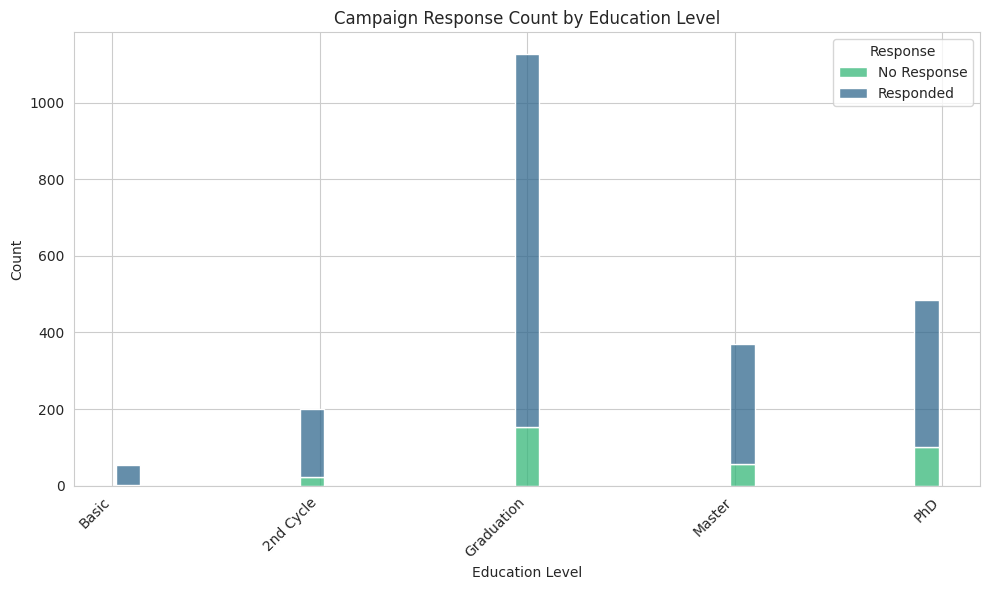

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Create a stacked bar plot for Response rate by Education level
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Education', hue='Response', multiple='stack', palette='viridis', shrink=0.8)
plt.title('Campaign Response Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=sorted(df['Education'].unique()), labels=['Basic', '2nd Cycle', 'Graduation', 'Master', 'PhD'], rotation=45, ha='right') # Using original labels for readability
plt.legend(title='Response', labels=['No Response', 'Responded'])
plt.tight_layout()
plt.show()


Summarize the key insights derived from the exploratory data analysis and hypothesis testing regarding the factors influencing customer acquisition. Provide clear conclusions about how the marketing mix elements (Product, Price, Place, Promotion) and demographics (Age, Education, Marital Status, Children) affect customer behavior and acquisition, suggesting actionable recommendations for marketing strategies.


## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing & Feature Engineering**:
    *   Inconsistent categorical values in 'Education' ('2n Cycle') and 'Marital\_Status' ('YOLO', 'Absurd', 'Alone') were standardized to '2nd Cycle' and 'Single' respectively.
    *   New features 'TotalChildren' (sum of 'Kidhome' and 'Teenhome') and 'TotalPurchases' (sum of 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases') were successfully created.
    *   Outliers in 'TotalSpending' and 'TotalPurchases' were treated by capping values at the 99th percentile (e.g., 'TotalSpending' max capped at 2126.0, 'TotalPurchases' max capped at 32.0).
    *   'Education' was ordinally encoded with a logical hierarchy (Basic: 0 to PhD: 4).
    *   'Marital\_Status' and 'Country' were one-hot encoded, expanding the feature set.
*   **Customer Spending and Product Performance**:
    *   'MntWines' ($\$680,038$) and 'MntMeatProducts' ($\$373,393$) were identified as the top-performing product categories by total revenue.
    *   'MntFruits' ($\$58,767$) and 'MntSweetProducts' ($\$60,553$) were the lowest-revenue categories.
*   **Geographic Campaign Response**:
    *   Spain (SP) exhibited the highest number of accepted campaigns ($\text{176}$), significantly outperforming other countries like SA ($\text{52}$) and CA ($\text{38}$).
    *   A hypothesis test revealed no significant difference in 'TotalPurchases' between customers in the United States and those in the rest of the world (p-value $\text{0.123} > \text{0.05}$).
*   **Demographic Influence on Shopping Behavior**:
    *   **Age vs. Shopping Preferences**: Older individuals ($\ge \text{56}$ years) showed significantly higher mean 'NumStorePurchases' ($\text{6.23}$) and 'NumWebPurchases' ($\text{4.47}$) compared to younger individuals ($\text{< 56}$ years) (p-values $\text{0.000}$ for both), indicating higher overall purchasing engagement across channels, rather than a sole preference for in-store shopping.
    *   **Children vs. Shopping Preferences**: Customers *without* children exhibited significantly higher mean 'NumWebPurchases' ($\text{4.39}$) and 'NumStorePurchases' ($\text{7.27}$) than customers *with* children (p-values $\text{0.001}$ and $\text{0.000}$ respectively). This contradicts the hypothesis that customers with children prefer online shopping; instead, customers without children generally purchase more.
*   **Channel Interaction (Cannibalization Hypothesis)**:
    *   There was no evidence of cannibalization between physical store sales and alternative channels. Instead, a moderate positive correlation was found between 'NumStorePurchases' and 'NumWebPurchases' ($\text{0.502}$), and 'NumStorePurchases' and 'NumCatalogPurchases' ($\text{0.519}$), suggesting a synergistic or complementary relationship between channels.
*   **Education and Campaign Response**:
    *   Visual analysis of campaign response rates across education levels suggests variations in engagement, but specific quantitative differences were not detailed in the hypothesis testing.